In [4]:
import geopandas as gpd
import pandas as pd
from libpysal import weights
import esda
import matplotlib.pyplot as plt
from splot.esda import plot_moran
import numpy as np


In [214]:
# Step 1: Load the shapefile for U.S. states
#shapefile_path = "C:\\Users\praka\\OneDrive\\Documents\\NCU PhD Program\\Jupyter Notebook\\tl_2012_us_state\\tl_2012_us_state.shp" 
#gdf = gpd.read_file(shapefile_path)
gdf = gpd.read_file("C:\\Users\\praka\\OneDrive\\Documents\\NCU PhD Program\\Jupyter Notebook\\tl_2012_us_state\\tl_2012_us_state.shp")


In [215]:
print(gdf.head())

   OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME LSAD  \
0         1      4        9      15  01779782    15     HI      Hawaii   00   
1         2      3        7      05  00068085    05     AR    Arkansas   00   
2         3      4        8      35  00897535    35     NM  New Mexico   00   
3         4      4        8      30  00767982    30     MT     Montana   00   
4         5      1        2      36  01779796    36     NY    New York   00   

   MTFCC FUNCSTAT         ALAND        AWATER     INTPTLAT      INTPTLON  \
0  G4000        A  1.663425e+10  1.167874e+10  +19.8097670  -155.5061027   
1  G4000        A  1.347726e+11  2.959210e+09  +34.8955256  -092.4446262   
2  G4000        A  3.141611e+11  7.564385e+08  +34.4346843  -106.1316181   
3  G4000        A  3.769636e+11  3.868565e+09  +47.0511771  -109.6348174   
4  G4000        A  1.220579e+11  1.923885e+10  +42.9133974  -075.5962723   

     Shape_Leng    Shape_Area  \
0  2.419034e+06  3.268482e+10   
1 

In [216]:
# Step 2: Load the mortality dataset
mortality_data = pd.read_csv('C:\\Users\\praka\\OneDrive\\Documents\\NCU PhD Program\\Jupyter Notebook\\Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')

In [217]:
mortality_data.shape

(137700, 16)

In [218]:
mortality_data.dtypes

Data_As_Of                                 object
Start_Date                                 object
End_Date                                   object
Group                                      object
Year                                      float64
Month                                     float64
State                                      object
Sex                                        object
Age_Group                                  object
COVID_19_Deaths                           float64
Total_Deaths                              float64
Pneumonia_Deaths                          float64
Pneumonia_and_COVID_19_Deaths             float64
Influenza_Deaths                          float64
Pneumonia_Influenza_or_COVID_19_Deaths    float64
Footnote                                   object
dtype: object

In [219]:
print(mortality_data.head())

   Data_As_Of  Start_Date    End_Date     Group  Year  Month          State  \
0  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
1  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
2  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
3  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
4  09/27/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   

         Sex     Age_Group  COVID_19_Deaths  Total_Deaths  Pneumonia_Deaths  \
0  All Sexes      All Ages        1146774.0    12303399.0         1162844.0   
1  All Sexes  Under 1 year            519.0       73213.0            1056.0   
2  All Sexes    0-17 years           1696.0      130970.0            2961.0   
3  All Sexes     1-4 years            285.0       14299.0             692.0   
4  All Sexes    5-14 years            509.0       22008.0             818.0   

   Pneumonia_and_COVID_19_Deaths  Influenza_Deaths

In [220]:
# Define the subset conditions for seelcting mid-aged population
midage_conditions = (
    (mortality_data['Age_Group'].isin(['30-39 years', '35-44 years', '40-49 years'])) &  # Age group condition
    (mortality_data['State'] != 'United States') &                                       # Exclude "United States"
    (mortality_data['Year'].notnull()) &                                                 # Year should not be NULL
    (mortality_data['Month'].notnull()) &                                                # Month should not be NULL
    (mortality_data['Sex'].isin(['Male', 'Female']))                                     # Sex should be Male or Female
)

# Apply the conditions to filter the dataset
mid_age_df = mortality_data[midage_conditions]
print(mid_age_df)


        Data_As_Of  Start_Date    End_Date     Group    Year  Month  \
16090   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16091   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16092   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16107   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16108   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
...            ...         ...         ...       ...     ...    ...   
137675  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137676  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137691  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137692  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137693  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   

              State     Sex    Age_Group  COVID_19_Deaths  Total_Deaths  \
16090       Alabama    Male  30-39 years              0.0          67.0 

In [221]:
#validate the rows and columns of the subset of data for the mi-age population
mid_age_df.shape


(14310, 16)

In [222]:
# Check the result
print(mid_age_df.head())  # Displays the first few rows of the filtered data frame

       Data_As_Of  Start_Date    End_Date     Group    Year  Month    State  \
16090  09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0  Alabama   
16091  09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0  Alabama   
16092  09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0  Alabama   
16107  09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0  Alabama   
16108  09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0  Alabama   

          Sex    Age_Group  COVID_19_Deaths  Total_Deaths  Pneumonia_Deaths  \
16090    Male  30-39 years              0.0          67.0               NaN   
16091    Male  35-44 years              0.0          82.0               NaN   
16092    Male  40-49 years              0.0         129.0               NaN   
16107  Female  30-39 years              0.0          36.0               0.0   
16108  Female  35-44 years              0.0          50.0               NaN   

       Pneumonia_and_COVID_19_Deaths  Influenza_De

In [223]:
# Step 3: Merge GeoDataFrame (gdf) with mortality data on the state column
# 'State' is the column that matches  with NAME in shape file for the merge-key
gdf = gdf.merge(mid_age_df, how="left", left_on="NAME", right_on="State")  # Adjust columns as needed

In [224]:
print(gdf.head())

   OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS    NAME LSAD  \
0         1      4        9      15  01779782    15     HI  Hawaii   00   
1         1      4        9      15  01779782    15     HI  Hawaii   00   
2         1      4        9      15  01779782    15     HI  Hawaii   00   
3         1      4        9      15  01779782    15     HI  Hawaii   00   
4         1      4        9      15  01779782    15     HI  Hawaii   00   

   MTFCC  ...   State     Sex    Age_Group COVID_19_Deaths Total_Deaths  \
0  G4000  ...  Hawaii    Male  30-39 years             0.0         21.0   
1  G4000  ...  Hawaii    Male  35-44 years             0.0         24.0   
2  G4000  ...  Hawaii    Male  40-49 years             0.0         29.0   
3  G4000  ...  Hawaii  Female  30-39 years             0.0          NaN   
4  G4000  ...  Hawaii  Female  35-44 years             0.0         10.0   

   Pneumonia_Deaths  Pneumonia_and_COVID_19_Deaths Influenza_Deaths  \
0               0.0        

In [225]:
# Step 4: Drop rows with missing values in relevant mortality columns
gdf_clean = gdf.dropna(subset=['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths'])



In [226]:
gdf.shape

(14047, 34)

In [227]:
print(gdf_clean.head())

    OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS    NAME LSAD  \
0          1      4        9      15  01779782    15     HI  Hawaii   00   
5          1      4        9      15  01779782    15     HI  Hawaii   00   
7          1      4        9      15  01779782    15     HI  Hawaii   00   
8          1      4        9      15  01779782    15     HI  Hawaii   00   
11         1      4        9      15  01779782    15     HI  Hawaii   00   

    MTFCC  ...   State     Sex    Age_Group COVID_19_Deaths Total_Deaths  \
0   G4000  ...  Hawaii    Male  30-39 years             0.0         21.0   
5   G4000  ...  Hawaii  Female  40-49 years             0.0         14.0   
7   G4000  ...  Hawaii    Male  35-44 years             0.0         13.0   
8   G4000  ...  Hawaii    Male  40-49 years             0.0         19.0   
11  G4000  ...  Hawaii  Female  40-49 years             0.0         14.0   

    Pneumonia_Deaths  Pneumonia_and_COVID_19_Deaths Influenza_Deaths  \
0             

In [19]:
# Step 5: Calculate spatial weights matrix using Queen contiguity
w = weights.Queen.from_dataframe(gdf_clean, use_index=True)

C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [20]:
print(w)

In [21]:
# Step 6: Standardize the mortality rates for each disease (optional but helps with scale differences)
gdf_clean['COVID_19_Deaths_standardized'] = (gdf_clean['COVID_19_Deaths'] - gdf_clean['COVID_19_Deaths'].mean()) / gdf_clean['COVID_19_Deaths'].std()
gdf_clean['Influenza_Deaths_standardized'] = (gdf_clean['Influenza_Deaths'] - gdf_clean['Influenza_Deaths'].mean()) / gdf_clean['Influenza_Deaths'].std()
gdf_clean['Pneumonia_Deaths_standardized'] = (gdf_clean['Pneumonia_Deaths'] - gdf_clean['Pneumonia_Deaths'].mean()) / gdf_clean['Pneumonia_Deaths'].std()
gdf_clean['Total_Deaths_standardized'] = (gdf_clean['Total_Deaths'] - gdf_clean['Total_Deaths'].mean()) / gdf_clean['Total_Deaths'].std()


C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\praka

In [22]:
# Step 7: Compute Moran's I for COVID-19 mortality rates
moran_covid = esda.Moran(gdf_clean['COVID_19_Deaths_standardized'], w)

# Step 8: Compute Moran's I for Influenza mortality rates
moran_influenza = esda.Moran(gdf_clean['Influenza_Deaths_standardized'], w)

# Step 9: Compute Moran's I for Pneumonia mortality rates
moran_pneumonia = esda.Moran(gdf_clean['Pneumonia_Deaths_standardized'], w)

# Step 10: Compute Moran's I for Total mortality rates
moran_total = esda.Moran(gdf_clean['Total_Deaths_standardized'], w)

In [23]:
# Step 11: Print Moran's I result for interpretation
print(f"Moran's I for COVID-19 Mortality Rates: {moran_covid.I}, p-value: {moran_covid.p_sim}")
print(f"Moran's I for Influenza Mortality Rates: {moran_influenza.I}, p-value: {moran_influenza.p_sim}")
print(f"Moran's I for Pneumonia Mortality Rates: {moran_pneumonia.I}, p-value: {moran_pneumonia.p_sim}")
print(f"Moran's I for Total Mortality Rates: {moran_total.I}, p-value: {moran_total.p_sim}")


Moran's I for COVID-19 Mortality Rates: 0.14418245082410064, p-value: 0.001
Moran's I for Influenza Mortality Rates: 0.005590809513805751, p-value: 0.008
Moran's I for Pneumonia Mortality Rates: 0.18623776330871905, p-value: 0.001
Moran's I for Total Mortality Rates: 0.36078320387852175, p-value: 0.001


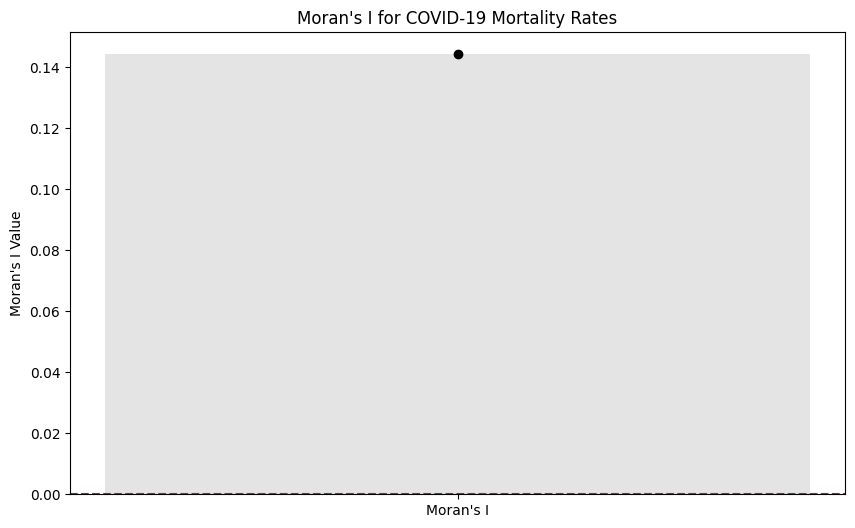

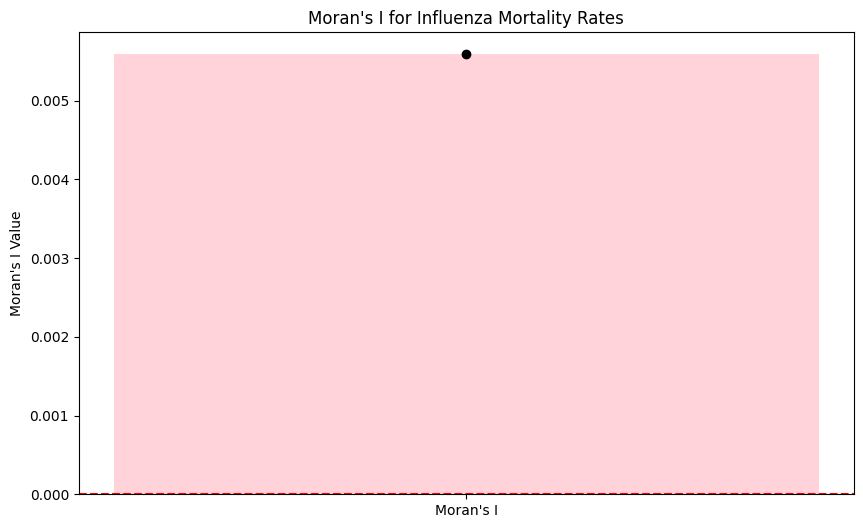

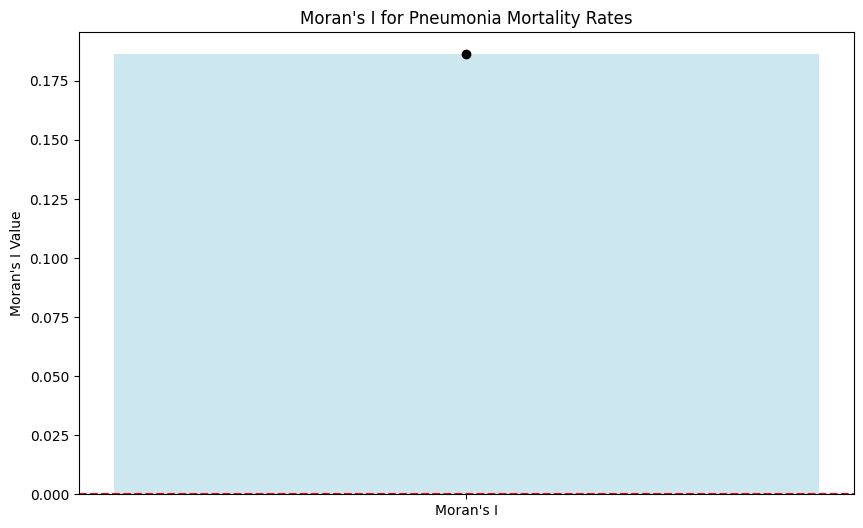

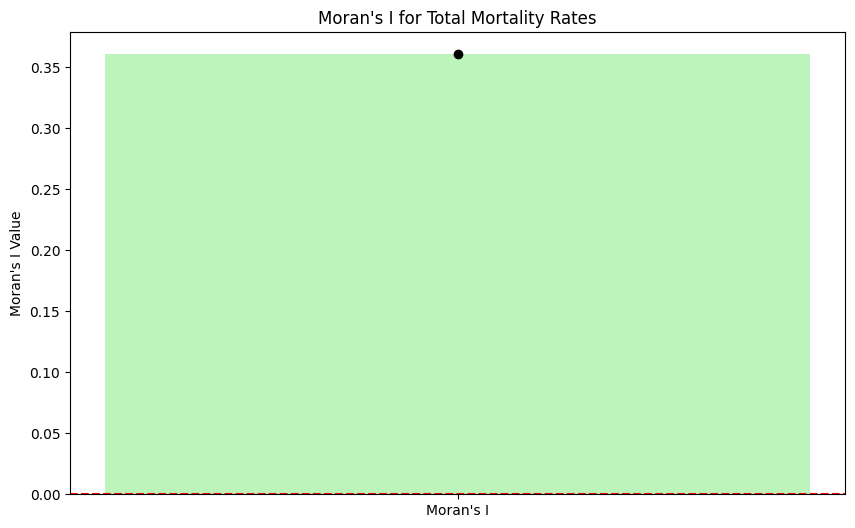

In [24]:
# Step 12: Plot Moran's I for COVID-19 mortality rates

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(10, 6))

# Extracting required values
moran_covid_vals = moran_covid.I
moran_covid_pvals = moran_covid.p_sim

# Create a bar plot
ax.bar(['Moran\'s I'], [moran_covid_vals], color='lightgrey', alpha=0.6)
ax.errorbar(['Moran\'s I'], [moran_covid_vals], yerr=[1.96 * np.std(moran_covid_vals)], fmt='o', color='black')

ax.set_title("Moran's I for COVID-19 Mortality Rates")
ax.set_ylabel("Moran's I Value")
ax.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()

# Step 13: Plot Moran's I for Influenza mortality rates
fig, ax = plt.subplots(1, figsize=(10, 6))

# Extracting required values
moran_influenza_vals = moran_influenza.I
moran_influenza_pvals = moran_influenza.p_sim

# Create a bar plot
ax.bar(['Moran\'s I'], [moran_influenza_vals], color='lightpink', alpha=0.6)
ax.errorbar(['Moran\'s I'], [moran_influenza_vals], yerr=[1.96 * np.std(moran_influenza_vals)], fmt='o', color='black')

ax.set_title("Moran's I for Influenza Mortality Rates")
ax.set_ylabel("Moran's I Value")
ax.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()

# Step 14: Plot Moran's I for Pneumonia mortality rates
fig, ax = plt.subplots(1, figsize=(10, 6))

# Extracting required values
moran_pneumonia_vals = moran_pneumonia.I
moran_pneumonia_pvals = moran_pneumonia.p_sim

# Create a bar plot
ax.bar(['Moran\'s I'], [moran_pneumonia_vals], color='lightblue', alpha=0.6)
ax.errorbar(['Moran\'s I'], [moran_pneumonia_vals], yerr=[1.96 * np.std(moran_pneumonia_vals)], fmt='o', color='black')

ax.set_title("Moran's I for Pneumonia Mortality Rates")
ax.set_ylabel("Moran's I Value")
ax.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()

# Step 15: Plot Moran's I for Total mortality rates
fig, ax = plt.subplots(1, figsize=(10, 6))

# Extracting required values
moran_total_vals = moran_total.I
moran_total_pvals = moran_total.p_sim

# Create a bar plot
ax.bar(['Moran\'s I'], [moran_total_vals], color='lightgreen', alpha=0.6)
ax.errorbar(['Moran\'s I'], [moran_total_vals], yerr=[1.96 * np.std(moran_total_vals)], fmt='o', color='black')

ax.set_title("Moran's I for Total Mortality Rates")
ax.set_ylabel("Moran's I Value")
ax.axhline(0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()


In [25]:
#Geospatial Cluster map - Spatial cluster detection

import matplotlib.pyplot as plt
from esda.moran import Moran_Local
import numpy as np

# Step 11: Calculate Local Moran's I for COVID-19, Influenza, Pneumonia, and Total Deaths
moran_local_covid = Moran_Local(gdf_clean['COVID_19_Deaths_standardized'], w)
moran_local_influenza = Moran_Local(gdf_clean['Influenza_Deaths_standardized'], w)
moran_local_pneumonia = Moran_Local(gdf_clean['Pneumonia_Deaths_standardized'], w)
moran_local_total = Moran_Local(gdf_clean['Total_Deaths_standardized'], w)

# Step 12: Create cluster labels based on Local Moran's I results
def create_cluster_labels(moran_local):
    cluster_labels = np.zeros_like(moran_local.Is, dtype=str)
    
    # Significant clusters (p < 0.05)
    sig = moran_local.p_sim < 0.05
    
    # High-High (Hot Spots)
    high_high = sig & (moran_local.Is > 0) & (moran_local.z_sim > 0)
    cluster_labels[high_high] = "High-High"
    
    # Low-Low (Cold Spots)
    low_low = sig & (moran_local.Is > 0) & (moran_local.z_sim < 0)
    cluster_labels[low_low] = "Low-Low"
    
    # Low-High (Spatial Outliers)
    low_high = sig & (moran_local.Is < 0) & (moran_local.z_sim > 0)
    cluster_labels[low_high] = "Low-High"
    
    # High-Low (Spatial Outliers)
    high_low = sig & (moran_local.Is < 0) & (moran_local.z_sim < 0)
    cluster_labels[high_low] = "High-Low"
    
    # Non-significant areas
    cluster_labels[~sig] = "Non-significant"
    
    return cluster_labels

# Step 13: Add cluster labels to GeoDataFrame
gdf_clean['COVID_19_Cluster'] = create_cluster_labels(moran_local_covid)
gdf_clean['Influenza_Cluster'] = create_cluster_labels(moran_local_influenza)
gdf_clean['Pneumonia_Cluster'] = create_cluster_labels(moran_local_pneumonia)
gdf_clean['Total_Deaths_Cluster'] = create_cluster_labels(moran_local_total)



C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\praka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\praka

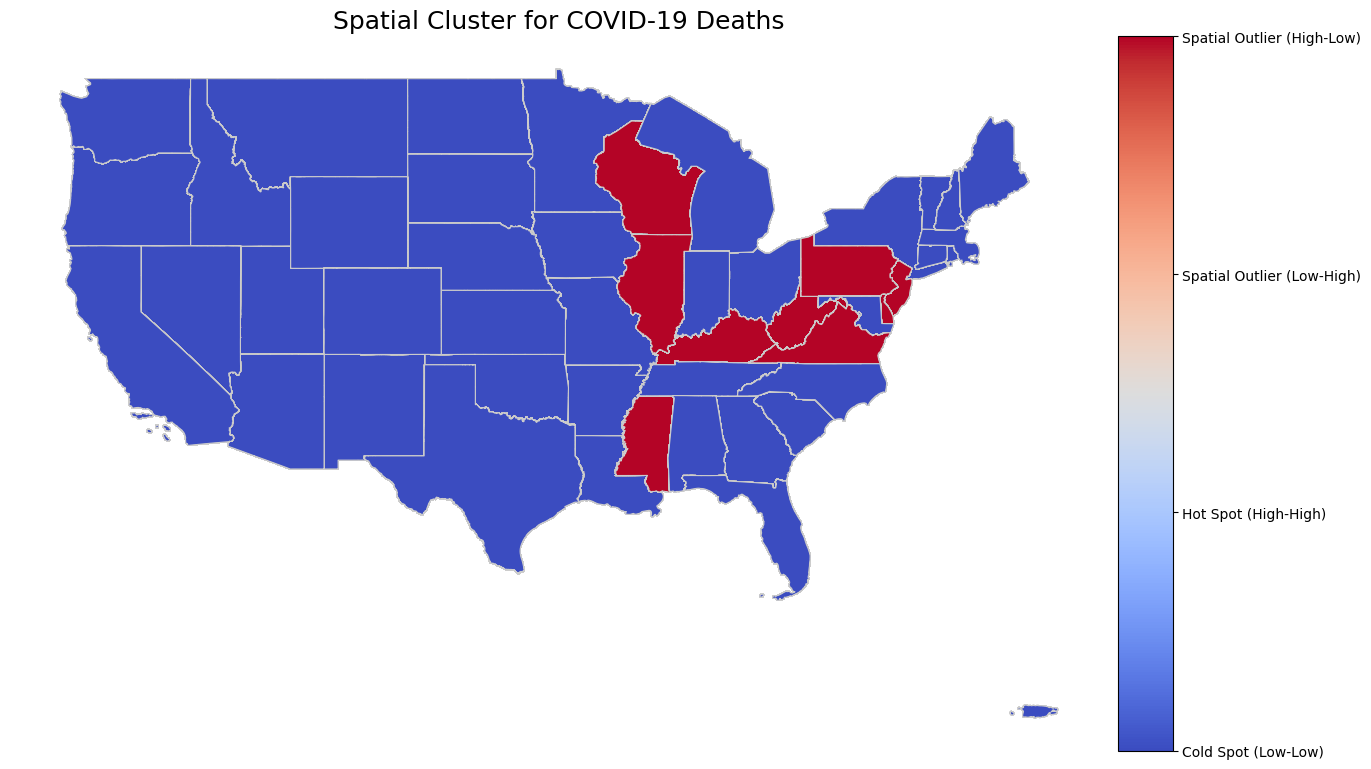

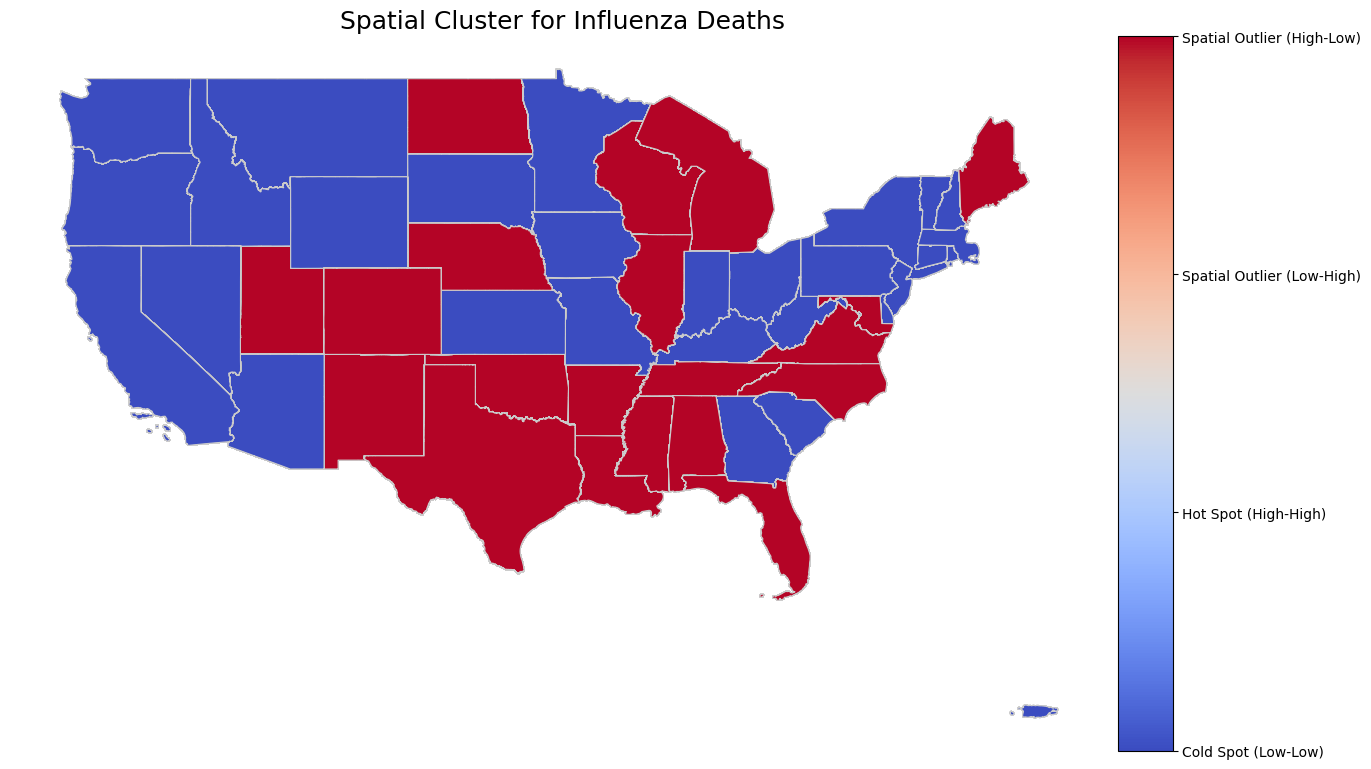

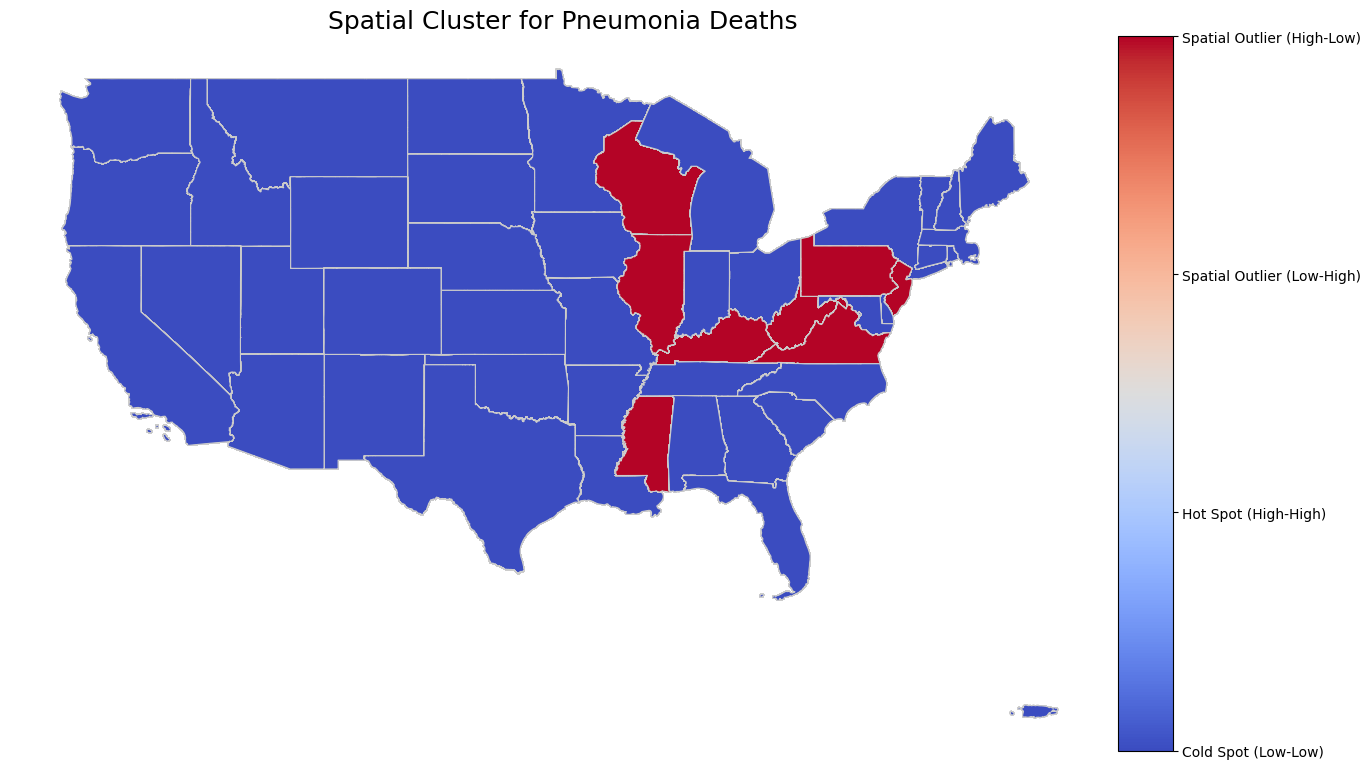

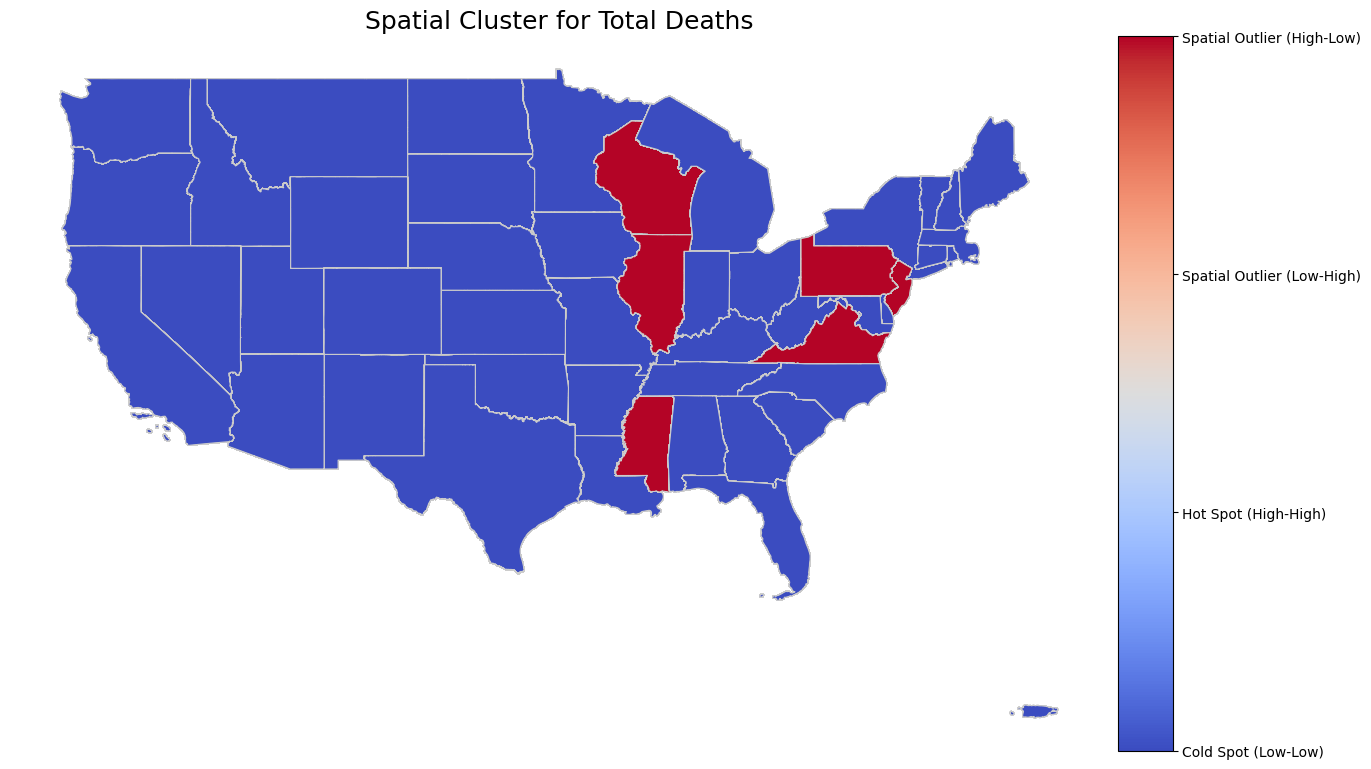

In [26]:
#step 13 - Generate Spatial Cluster maps for mortality rates

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Exclude specific states
excluded_states = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Guam','United States Virgin Islands','Alaska','Hawaii']
gdf_clean = gdf_clean[~gdf_clean['NAME'].isin(excluded_states)]

# Find unique states from the 'NAME' column
#unique_states = gdf_clean['NAME'].unique()

# Print the distinct states
#print(unique_states)

# Updated function to plot larger cluster maps with a consistent legend
def plot_cluster_map(gdf, cluster_col, title):
    fig, ax = plt.subplots(1, figsize=(15, 10))  # Increase figure size to 15x10 for larger map
    divider = make_axes_locatable(ax)

    # Plot the map with correct colors and edge settings
    gdf.plot(column=cluster_col, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
    
    # Create a colorbar inside the map
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=1, vmax=4))  # Assuming 4 clusters
    sm.set_array([])  # Set array for colorbar to recognize
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_ticks([1, 2, 3, 4])  # Set ticks for your cluster types
    cbar.set_ticklabels(['Cold Spot (Low-Low)', 'Hot Spot (High-High)', 'Spatial Outlier (Low-High)', 'Spatial Outlier (High-Low)'])  # Custom tick labels

    # Manually add labels to the map (Hot Spot, Cold Spot, etc.)
    cluster_labels = {
        1: "Hot Spot (High-High)",
        2: "Cold Spot (Low-Low)",
        3: "Spatial Outlier (Low-High)",
        4: "Spatial Outlier (High-Low)",
        0: "Non-significant"  # Assuming 0 corresponds to non-significant
    }
    
    # Update legend labels on the map directly
    for idx, row in gdf.iterrows():
        if row[cluster_col] in cluster_labels:
            label = cluster_labels[row[cluster_col]]
            ax.annotate(label, xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                        horizontalalignment='center', fontsize=8, color='black')
    
    ax.set_title(title, fontsize=18)  # Set a bigger title font size
    ax.set_axis_off()  # Remove the axis for a cleaner map look
    plt.show()

# Generate larger maps with updated legends
plot_cluster_map(gdf_clean, 'COVID_19_Cluster', "Spatial Cluster for COVID-19 Deaths")
plot_cluster_map(gdf_clean, 'Influenza_Cluster', " Spatial Cluster for Influenza Deaths")
plot_cluster_map(gdf_clean, 'Pneumonia_Cluster', " Spatial Cluster for Pneumonia Deaths")
plot_cluster_map(gdf_clean, 'Total_Deaths_Cluster', "Spatial Cluster for Total Deaths")


In [27]:
# Sort the gdf_clean dataframe by COVID_19_Deaths in descending order
print(gdf_clean)
gdf_sorted = gdf_clean[['NAME', 'COVID_19_Deaths']].sort_values(by='COVID_19_Deaths', ascending=False)

# Display the result
print(gdf_sorted)

       OBJECTID REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME  \
338           2      3        7      05  00068085    05     AR    Arkansas   
344           2      3        7      05  00068085    05     AR    Arkansas   
350           2      3        7      05  00068085    05     AR    Arkansas   
363           2      3        7      05  00068085    05     AR    Arkansas   
383           2      3        7      05  00068085    05     AR    Arkansas   
...         ...    ...      ...     ...       ...   ...    ...         ...   
13970        56      4        9      06  01779778    06     CA  California   
13971        56      4        9      06  01779778    06     CA  California   
14000        56      4        9      06  01779778    06     CA  California   
14001        56      4        9      06  01779778    06     CA  California   
14007        56      4        9      06  01779778    06     CA  California   

      LSAD  MTFCC  ... Pneumonia_Influenza_or_COVID_19_Deaths  

                    NAME  COVID_19_Deaths Deaths_Binned
42                 Texas          10311.0         2500+
3             California           8407.0         2500+
8                Florida           6253.0         2500+
9                Georgia           2848.0         2500+
33                  Ohio           2311.0     2001-2500
1                Arizona           2233.0     2001-2500
30              New York           1989.0     1501-2000
31        North Carolina           1863.0     1501-2000
41             Tennessee           1807.0     1501-2000
11              Illinois           1805.0     1501-2000
36          Pennsylvania           1793.0     1501-2000
20              Michigan           1711.0     1501-2000
28            New Jersey           1198.0     1001-1500
0                Alabama           1059.0     1001-1500
34              Oklahoma            984.0      501-1000
39        South Carolina            953.0      501-1000
16             Louisiana            932.0      5

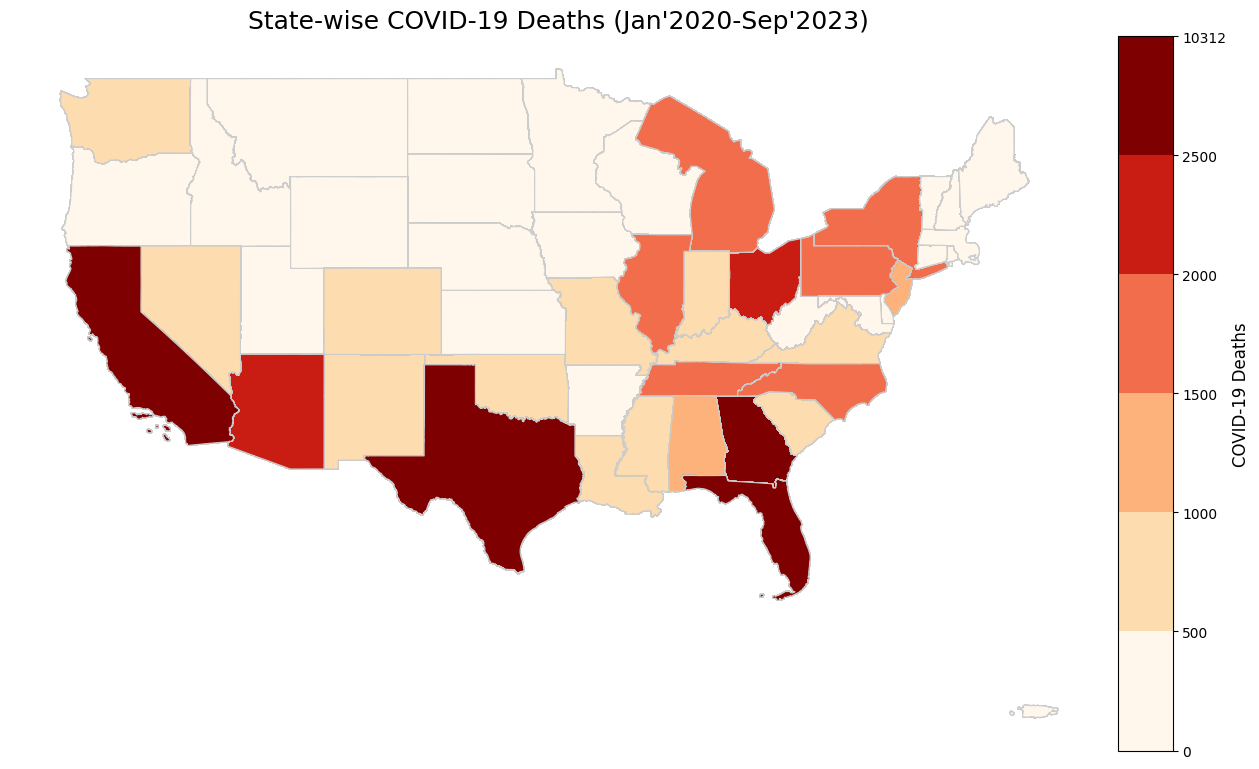

In [28]:
#Below map is for overall Covid-19 mortality for the period, Jan-2020 till Sep-2023

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data

# Exclude specific states
excluded_states = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Guam','United States Virgin Islands','Alaska','Hawaii']
gdf_clean = gdf_clean[~gdf_clean['NAME'].isin(excluded_states)]

# Step 1: Sum the COVID-19 deaths per state
state_deaths = gdf_clean.groupby('NAME')['COVID_19_Deaths'].sum().reset_index()

# Step 2: Define custom bins and labels
bins = [0, 500, 1000, 1500, 2000, 2500, state_deaths['COVID_19_Deaths'].max() + 1]  # Max value included
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 3: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['COVID_19_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 4: Check the assigned bins and print state-wise deaths in descending order
print(state_deaths[['NAME', 'COVID_19_Deaths', 'Deaths_Binned']].sort_values(by='COVID_19_Deaths', ascending=False))

# Step 5: Set up the color map and normalization
cmap = plt.cm.OrRd  # Using 'OrRd' (Orange-Red) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 6: Create the choropleth map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)

# Merge binned data with original gdf_clean
gdf_clean = gdf_clean.merge(state_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')  # Ensure the binned data is merged correctly

# Plot the states and assign colors based on the binned deaths
gdf_clean.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Step 7: Add color bar
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('COVID-19 Deaths', fontsize=12)

# Step 8: Annotate state names and death counts on the map
for idx, row in gdf_clean.iterrows():
    if not pd.isna(row['COVID_19_Deaths']) and row['COVID_19_Deaths'] > 0:
        text = f"{row['NAME']}: {int(row['COVID_19_Deaths'])}"
        plt.annotate(text, 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=8, color='black')

# Add a title and remove axis for clean map
ax.set_title("State-wise COVID-19 Deaths (Jan'2020-Sep'2023)", fontsize=18)
ax.set_axis_off()

# Show the map
plt.show()


State-wise Influenza Deaths (Sum):
                    NAME  Influenza_Deaths
0                Alabama               0.0
1                Arizona               0.0
2               Arkansas               0.0
3             California              84.0
4               Colorado               0.0
5            Connecticut               0.0
6               Delaware               0.0
7   District of Columbia               0.0
8                Florida               0.0
9                Georgia               0.0
10                 Idaho               0.0
11              Illinois               0.0
12               Indiana               0.0
13                  Iowa               0.0
14                Kansas               0.0
15              Kentucky               0.0
16             Louisiana               0.0
17                 Maine               0.0
18              Maryland               0.0
19         Massachusetts               0.0
20              Michigan               0.0
21             Minn

KeyError: 'Deaths_Binned'

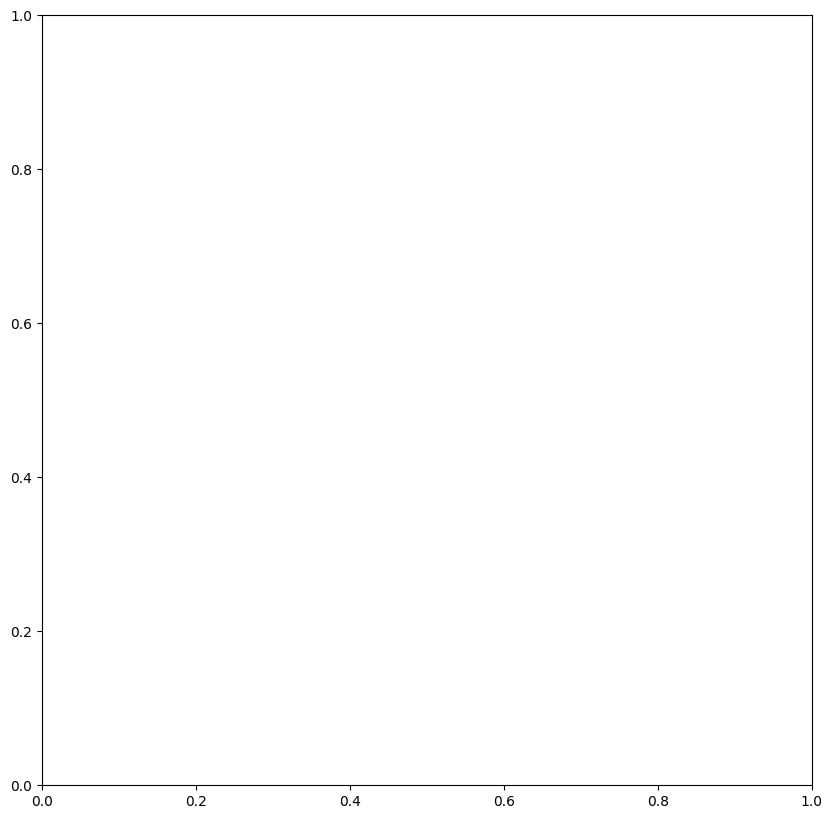

In [29]:
#Below map is for overall Influenza mortality for the period, Jan-2020 till Sep-2023
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data

# Exclude specific states
excluded_states = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Guam','United States Virgin Islands','Alaska','Hawaii']
gdf_clean = gdf_clean[~gdf_clean['NAME'].isin(excluded_states)]

# Step 1: Sum the Influenza deaths per state
state_deaths = gdf_clean.groupby('NAME')['Influenza_Deaths'].sum().reset_index()

# Debugging: Check the summed deaths
print("State-wise Influenza Deaths (Sum):")
print(state_deaths)

# Step 2: Define custom bins and labels
max_value = state_deaths['Influenza_Deaths'].max()  # Get the max value from state_deaths
print(f"Maximum value of Influenza Deaths: {max_value}")  # Debug print

# Define the bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, max_value + 1]  # Create bins including max value

# Check for monotonicity
print("Bins before sorting:", bins)
if len(set(bins)) != len(bins):
    print("Warning: Bins contain duplicates!")

# Sort bins to ensure they are monotonically increasing
bins = sorted(set(bins))  # Use set to eliminate duplicates, then sort

# Confirm the final bins
print("Bins after sorting:", bins)

# Define bin labels accordingly
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50','51-60','61-70','71-80', f"{bins[-2]}+"]  # Label for the max bin

# Step 3: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Influenza_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 4: Check the assigned bins and print state-wise deaths in descending order
print(state_deaths[['NAME', 'Influenza_Deaths', 'Deaths_Binned']].sort_values(by='Influenza_Deaths', ascending=False))

# Step 5: Set up the color map and normalization
cmap = plt.cm.BuGn  # Using 'BuGn' (Blue-Green) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 6: Create the choropleth map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)

# Merge binned data with original gdf_clean
gdf_clean = gdf_clean.merge(state_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')  # Ensure the binned data is merged correctly

# Plot the states and assign colors based on the binned deaths
gdf_clean.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Step 7: Add color bar
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Influenza Deaths', fontsize=12)

# Step 8: Annotate state names and death counts on the map
for idx, row in gdf_clean.iterrows():
    if not pd.isna(row['Influenza_Deaths']) and row['Influenza_Deaths'] > 0:
        text = f"{row['NAME']}: {int(row['Influenza_Deaths'])}"
        plt.annotate(text, 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=8, color='black')

# Add a title and remove axis for clean map
ax.set_title("State-wise Influenza Deaths (Jan'2020-Sep'2023)", fontsize=18)
ax.set_axis_off()

# Show the map
plt.show()


In [ ]:
#Below map is for overall Pneumonia mortality for the period, Jan-2020 till Sep-2023
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data

# Exclude specific states
excluded_states = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Guam','United States Virgin Islands','Alaska','Hawaii']
gdf_clean = gdf_clean[~gdf_clean['NAME'].isin(excluded_states)]

# Step 1: Sum the Pneumonia deaths per state
state_deaths = gdf_clean.groupby('NAME')['Pneumonia_Deaths'].sum().reset_index()

# Debugging: Check the summed deaths
print("State-wise Pneumonia Deaths (Sum):")
print(state_deaths)

# Step 2: Define custom bins and labels
max_value = state_deaths['Pneumonia_Deaths'].max()  # Get the max value from state_deaths
print(f"Maximum value of Pneumonia Deaths: {max_value}")  # Debug print

# Define the bins
bins = [0, 500, 1000, 1500, 2000, 2500, max_value + 1]  # Create bins including max value

# Check for monotonicity
print("Bins before sorting:", bins)
if len(set(bins)) != len(bins):
    print("Warning: Bins contain duplicates!")

# Sort bins to ensure they are monotonically increasing
bins = sorted(set(bins))  # Use set to eliminate duplicates, then sort

# Confirm the final bins
print("Bins after sorting:", bins)

# Define bin labels accordingly
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 3: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Pneumonia_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 4: Check the assigned bins and print state-wise deaths in descending order
print(state_deaths[['NAME', 'Pneumonia_Deaths', 'Deaths_Binned']].sort_values(by='Pneumonia_Deaths', ascending=False))

# Step 5: Set up the color map and normalization
cmap = plt.cm.BuPu  # Using 'BuPu' (Blue-Purple) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 6: Create the choropleth map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)

# Merge binned data with original gdf_clean
gdf_clean = gdf_clean.merge(state_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')  # Ensure the binned data is merged correctly

# Plot the states and assign colors based on the binned deaths
gdf_clean.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Step 7: Add color bar
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Pneumonia Deaths', fontsize=12)

# Step 8: Annotate state names and death counts on the map
for idx, row in gdf_clean.iterrows():
    if not pd.isna(row['Pneumonia_Deaths']) and row['Pneumonia_Deaths'] > 0:
        text = f"{row['NAME']}: {int(row['Pneumonia_Deaths'])}"
        plt.annotate(text, 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=8, color='black')

# Add a title and remove axis for clean map
ax.set_title("State-wise Pneumonia Deaths (Jan'2020-Sep'2023)", fontsize=18)
ax.set_axis_off()

# Show the map
plt.show()

In [ ]:
#Below map is for overall Total mortality for the period, Jan-2020 till Sep-2023
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data

# Exclude specific states
excluded_states = ['American Samoa', 'Commonwealth of the Northern Mariana Islands', 'Guam','United States Virgin Islands','Alaska','Hawaii']
gdf_clean = gdf_clean[~gdf_clean['NAME'].isin(excluded_states)]

# Step 1: Sum the Total deaths per state
state_deaths = gdf_clean.groupby('NAME')['Total_Deaths'].sum().reset_index()

# Debugging: Check the summed deaths
print("State-wise Total Deaths (Sum):")
print(state_deaths)

# Step 2: Define custom bins and labels
max_value = state_deaths['Total_Deaths'].max()  # Get the max value from state_deaths
print(f"Maximum value of Total Deaths: {max_value}")  # Debug print

# Define the bins
bins = [0, 500, 1000, 1500, 2000, 2500, max_value + 1]  # Create bins including max value

# Check for monotonicity
print("Bins before sorting:", bins)
if len(set(bins)) != len(bins):
    print("Warning: Bins contain duplicates!")

# Sort bins to ensure they are monotonically increasing
bins = sorted(set(bins))  # Use set to eliminate duplicates, then sort

# Confirm the final bins
print("Bins after sorting:", bins)

# Define bin labels accordingly
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 3: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Total_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 4: Check the assigned bins and print state-wise deaths in descending order
print(state_deaths[['NAME', 'Total_Deaths', 'Deaths_Binned']].sort_values(by='Total_Deaths', ascending=False))

# Step 5: Set up the color map and normalization
cmap = plt.cm.PuRd  # Using 'PuRd' (Purple-Red) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 6: Create the choropleth map
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)

# Merge binned data with original gdf_clean
gdf_clean = gdf_clean.merge(state_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')  # Ensure the binned data is merged correctly

# Plot the states and assign colors based on the binned deaths
gdf_clean.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Step 7: Add color bar
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Total Deaths', fontsize=12)

# Step 8: Annotate state names and death counts on the map
for idx, row in gdf_clean.iterrows():
    if not pd.isna(row['Total_Deaths']) and row['Total_Deaths'] > 0:
        text = f"{row['NAME']}: {int(row['Total_Deaths'])}"
        plt.annotate(text, 
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=8, color='black')

# Add a title and remove axis for clean map
ax.set_title("State-wise Total Deaths (Jan'2020-Sep'2023)", fontsize=18)
ax.set_axis_off()

# Show the map
plt.show()

In [ ]:
# Find unique states from the 'NAME' column
#unique_states = gdf_clean['NAME'].unique()

# Print the distinct states
#print(unique_states)

In [ ]:
# Find unique Age_Group from the 'NAME' column
unique_AgeGroup= gdf_clean['Age_Group'].unique()

# Print the distinct states
print(unique_AgeGroup)
#print(gdf_clean)

In [ ]:
#Year-wise COVID-19 mortality (2020-2023)
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

# Step 1: Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data
# Step 2: Sum the COVID-19 deaths per state per year for the filtered data
state_deaths = gdf_clean.groupby(['NAME', 'Year'])['COVID_19_Deaths'].sum().reset_index()

# Step 3: Define custom bins and labels
bins = [0, 500, 1000, 1500, 2000, 2500, state_deaths['COVID_19_Deaths'].max() + 1]  # Max value included
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 4: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['COVID_19_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 5: Check the assigned bins and print state-wise deaths in descending order for each year
for year in state_deaths['Year'].unique():
    print(f"Year: {year}")
    print(state_deaths[state_deaths['Year'] == year][['NAME', 'COVID_19_Deaths', 'Deaths_Binned']].sort_values(by='COVID_19_Deaths', ascending=False))

# Step 6: Set up the color map and normalization
cmap = plt.cm.OrRd  # Using 'OrRd' (Orange-Red) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 7: Create the choropleth map for each year
for year in state_deaths['Year'].unique():
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)

    # Make a copy of gdf_clean to avoid overwriting
    gdf_clean_copy = gdf_clean.copy()

    # Merge binned data with original gdf_clean for the current year
    year_deaths = state_deaths[state_deaths['Year'] == year]

    # Drop the 'Deaths_Binned' column if it already exists
    if 'Deaths_Binned' in gdf_clean_copy.columns:
        gdf_clean_copy = gdf_clean_copy.drop(columns=['Deaths_Binned'])

    # Merge the data for the current year
    gdf_clean_copy = gdf_clean_copy.merge(year_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')

    # Plot the states and assign colors based on the binned deaths
    gdf_clean_copy.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Step 8: Add color bar
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('COVID-19 Deaths', fontsize=12)

    # Step 9: Annotate state names and death counts on the map
    for idx, row in gdf_clean_copy.iterrows():
        if not pd.isna(row['COVID_19_Deaths']) and row['COVID_19_Deaths'] > 0:
            text = f"{row['NAME']}: {int(row['COVID_19_Deaths'])}"
            plt.annotate(text, 
                         xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                         horizontalalignment='center', fontsize=8, color='black')

    # Add a title and remove axis for clean map
    #ax.set_title(f"State-wise COVID-19 Deaths (Binned) - Year: {year}", fontsize=18)
    ax.set_title(f"State-wise COVID-19 Deaths (Binned) - Year: {int(year)}", fontsize=18)
    ax.set_axis_off()

    # Show the map for the current year
    plt.show()


In [ ]:
#Year-wise Influenza mortality (2020-2023)
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

# Step 1: Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data
# Step 2: Sum the Influenza deaths per state per year for the filtered data
state_deaths = gdf_clean.groupby(['NAME', 'Year'])['Influenza_Deaths'].sum().reset_index()

# Step 3: Define custom bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, state_deaths['Influenza_Deaths'].max() + 1]  # Max value included
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', f"{bins[-2]}+"]  # Label for the max bin

# Step 4: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Influenza_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 5: Check the assigned bins and print state-wise deaths in descending order for each year
for year in state_deaths['Year'].unique():
    print(f"Year: {year}")
    print(state_deaths[state_deaths['Year'] == year][['NAME', 'Influenza_Deaths', 'Deaths_Binned']].sort_values(by='Influenza_Deaths', ascending=False))

# Step 6: Set up the color map and normalization
cmap = plt.cm.BuGn  # Using 'BuGn' (Blue-Green) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 7: Create the choropleth map for each year
for year in state_deaths['Year'].unique():
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)

    # Make a copy of gdf_clean to avoid overwriting
    gdf_clean_copy = gdf_clean.copy()

    # Merge binned data with original gdf_clean for the current year
    year_deaths = state_deaths[state_deaths['Year'] == year]

    # Drop the 'Deaths_Binned' column if it already exists
    if 'Deaths_Binned' in gdf_clean_copy.columns:
        gdf_clean_copy = gdf_clean_copy.drop(columns=['Deaths_Binned'])

    # Merge the data for the current year
    gdf_clean_copy = gdf_clean_copy.merge(year_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')

    # Plot the states and assign colors based on the binned deaths
    gdf_clean_copy.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Step 8: Add color bar
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Influenza Deaths', fontsize=12)

    # Step 9: Annotate state names and death counts on the map
    for idx, row in gdf_clean_copy.iterrows():
        if not pd.isna(row['Influenza_Deaths']) and row['Influenza_Deaths'] > 0:
            text = f"{row['NAME']}: {int(row['Influenza_Deaths'])}"
            plt.annotate(text, 
                         xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                         horizontalalignment='center', fontsize=8, color='black')

    # Add a title and remove axis for clean map
    ax.set_title(f"State-wise Influenza Deaths (Binned) - Year: {int(year)}", fontsize=18)
    ax.set_axis_off()

    # Show the map for the current year
    plt.show()


In [ ]:
#Year-wise Pneumonia mortality (2020-2023)
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

# Step 1: Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming gdf_clean is already defined and contains the relevant data
# Step 2: Sum the Pneumonia deaths per state per year for the filtered data
state_deaths = gdf_clean.groupby(['NAME', 'Year'])['Pneumonia_Deaths'].sum().reset_index()

# Step 3: Define custom bins and labels
bins = [0, 500, 1000, 1500, 2000, 2500, state_deaths['Pneumonia_Deaths'].max() + 1]  # Max value included
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 4: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Pneumonia_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 5: Check the assigned bins and print state-wise deaths in descending order for each year
for year in state_deaths['Year'].unique():
    print(f"Year: {year}")
    print(state_deaths[state_deaths['Year'] == year][['NAME', 'Pneumonia_Deaths', 'Deaths_Binned']].sort_values(by='Pneumonia_Deaths', ascending=False))

# Step 6: Set up the color map and normalization
cmap = plt.cm.BuPu  # Using 'BuPu' (Blue-Purple) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 7: Create the choropleth map for each year
for year in state_deaths['Year'].unique():
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)

    # Make a copy of gdf_clean to avoid overwriting
    gdf_clean_copy = gdf_clean.copy()

    # Merge binned data with original gdf_clean for the current year
    year_deaths = state_deaths[state_deaths['Year'] == year]

    # Drop the 'Deaths_Binned' column if it already exists
    if 'Deaths_Binned' in gdf_clean_copy.columns:
        gdf_clean_copy = gdf_clean_copy.drop(columns=['Deaths_Binned'])

    # Merge the data for the current year
    gdf_clean_copy = gdf_clean_copy.merge(year_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')

    # Plot the states and assign colors based on the binned deaths
    gdf_clean_copy.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Step 8: Add color bar
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Pneumonia Deaths', fontsize=12)

    # Step 9: Annotate state names and death counts on the map
    for idx, row in gdf_clean_copy.iterrows():
        if not pd.isna(row['Pneumonia_Deaths']) and row['Pneumonia_Deaths'] > 0:
            text = f"{row['NAME']}: {int(row['Pneumonia_Deaths'])}"
            plt.annotate(text, 
                         xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                         horizontalalignment='center', fontsize=8, color='black')

    # Add a title and remove axis for clean map
    ax.set_title(f"State-wise Pneumonia Deaths (Binned) - Year: {int(year)}", fontsize=18)
    ax.set_axis_off()

    # Show the map for the current year
    plt.show()


In [ ]:
#Year-wise Total mortality (2020-2023)
#Please run from step-1 till step-13 (spatial outliers maps creation process) if this segment gives error of 'Death_Bins' or 'Bins not increase monotonically'.

# Step 1: Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mgwr.sel_bw import Sel_BW

# Assuming gdf_clean is already defined and contains the relevant data
# Step 2: Sum the Total deaths per state per year for the filtered data
state_deaths = gdf_clean.groupby(['NAME', 'Year'])['Total_Deaths'].sum().reset_index()

# Step 3: Define custom bins and labels
bins = [0, 500, 1000, 1500, 2000, 2500, state_deaths['Total_Deaths'].max() + 1]  # Max value included
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', f"{bins[-2]}+"]  # Label for the max bin

# Step 4: Create a new column to assign bin categories
state_deaths['Deaths_Binned'] = pd.cut(state_deaths['Total_Deaths'], bins=bins, labels=bin_labels, include_lowest=True)

# Step 5: Check the assigned bins and print state-wise deaths in descending order for each year
for year in state_deaths['Year'].unique():
    print(f"Year: {year}")
    print(state_deaths[state_deaths['Year'] == year][['NAME', 'Total_Deaths', 'Deaths_Binned']].sort_values(by='Total_Deaths', ascending=False))

# Step 6: Set up the color map and normalization
cmap = plt.cm.PuRd  # Using 'PuRd' (Purple-Red) colormap
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=cmap.N)

# Step 7: Create the choropleth map for each year
for year in state_deaths['Year'].unique():
    fig, ax = plt.subplots(1, figsize=(15, 10))
    divider = make_axes_locatable(ax)

    # Make a copy of gdf_clean to avoid overwriting
    gdf_clean_copy = gdf_clean.copy()

    # Merge binned data with original gdf_clean for the current year
    year_deaths = state_deaths[state_deaths['Year'] == year]

    # Drop the 'Deaths_Binned' column if it already exists
    if 'Deaths_Binned' in gdf_clean_copy.columns:
        gdf_clean_copy = gdf_clean_copy.drop(columns=['Deaths_Binned'])

    # Merge the data for the current year
    gdf_clean_copy = gdf_clean_copy.merge(year_deaths[['NAME', 'Deaths_Binned']], on='NAME', how='left')

    # Plot the states and assign colors based on the binned deaths
    gdf_clean_copy.plot(column='Deaths_Binned', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    # Step 8: Add color bar
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Total Deaths', fontsize=12)

    # Step 9: Annotate state names and death counts on the map
    for idx, row in gdf_clean_copy.iterrows():
        if not pd.isna(row['Total_Deaths']) and row['Total_Deaths'] > 0:
            text = f"{row['NAME']}: {int(row['Total_Deaths'])}"
            plt.annotate(text, 
                         xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                         horizontalalignment='center', fontsize=8, color='black')

    # Add a title and remove axis for clean map
    ax.set_title(f"State-wise Total Deaths (Binned) - Year: {int(year)}", fontsize=18)
    ax.set_axis_off()

    # Show the map for the current year
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import statsmodels.api as sm
import pysal.lib as ps
from pysal.model.spreg import GM_Lag, GM_Error
import joblib
import dill
import pickle
from mgwr.gwr import MGWR
from mgwr.sel_bw import Sel_BW
import os

# Assuming `gdf_clean` is already created and merged with mortality data for middle-aged population.
# We will evaluate models for four different variables: COVID_19_Deaths, Influenza_Deaths, Pneumonia_Deaths, Total_Deaths

# Define the dependent variables
dependent_vars = ['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths']
#dependent_vars = ['COVID_19_Deaths']

# Step 1: Data preparation
# Extract categorical variables: 'Age_Group', 'Sex', 'State'
X_vars_categorical = ['Age_Group', 'Sex', 'State']

# Function to encode categorical variables and run models
def run_geospatial_models(gdf, dependent_vars, X_vars_categorical):
    results = {}

    # Step 2: One-hot encode categorical variables
    enc = OneHotEncoder()
    X_encoded = enc.fit_transform(gdf[X_vars_categorical]).toarray()
    X_encoded_df = pd.DataFrame(X_encoded, columns=enc.get_feature_names_out(X_vars_categorical))

    # Merge back encoded columns into gdf_clean
    gdf = gdf.reset_index(drop=True)
    gdf = pd.concat([gdf, X_encoded_df], axis=1)

    for dep_var in dependent_vars:
        print(f"\nEvaluating for {dep_var}...")

        # Step 3: Prepare the data for the model
        y = gdf[dep_var].values
        X = X_encoded_df.values

        # Step 4: Standardize X variables
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X)

        # Add constant for OLS model
        X_with_const = sm.add_constant(X_standardized)

        # Extract coordinates
        coords = np.column_stack([gdf_clean.geometry.centroid.x, gdf_clean.geometry.centroid.y])
        
        # Check shapes
        print(f"coords shape: {coords.shape}")  # Should be (n, 2)
        print(f"y shape: {y.shape}")            # Should be (n,)
        print(f"X_standardized shape: {X_standardized.shape}")  # Should be (n, k)

        # Step 5: OLS Regression
        ols_model = sm.OLS(y, X_with_const)
        ols_results = ols_model.fit()

        print(f"OLS Results for {dep_var}:")
        print(ols_results.summary())

        # Step 6: Lasso Regression
        lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
        lasso_model.fit(X_standardized, y)
        lasso_score = lasso_model.score(X_standardized, y)
        print(f"Lasso R^2 for {dep_var}: {lasso_score}")

        # Step 7: GS2SLS (Generalized Spatial Two-Stage Least Squares)
        # Build spatial weights matrix (Queen contiguity)
        w = ps.weights.Queen.from_dataframe(gdf,use_index = False)
        w.transform = 'r'
        gs2sls_model = GM_Lag(y, X_standardized, w=w, name_y=dep_var, name_x=X_encoded_df.columns.tolist())
        print(f"GS2SLS Results for {dep_var}: {gs2sls_model.summary}")
 
        # Step 8: Spatial Lag Model (SLM)
        slm_model = GM_Lag(y, X_standardized, w=w, name_y=dep_var, name_x=X_encoded_df.columns.tolist())
        print(f"SLM Results for {dep_var}: {slm_model.summary}")

        # Step 9: Spatial Error Model (SEM)
        sem_model = GM_Error(y, X_standardized, w=w, name_y=dep_var, name_x=X_encoded_df.columns.tolist())
        print(f"SEM Results for {dep_var}: {sem_model.summary}")

        #Debug Code
        #Step 10 and 11- GWR and MGWR
        #Need to test separately. Code is not working here

        # Step 12: Clustering (DBSCAN and K-means)
        # DBSCAN
        dbscan_model = DBSCAN(eps=0.5, min_samples=5)
        gdf[f'dbscan_labels_{dep_var}'] = dbscan_model.fit_predict(coords)
        print(f"DBSCAN clusters for {dep_var}: {np.unique(gdf[f'dbscan_labels_{dep_var}'])}")

        # K-means
        kmeans_model = KMeans(n_clusters=5)
        gdf[f'kmeans_labels_{dep_var}'] = kmeans_model.fit_predict(coords)
        print(f"K-means clusters for {dep_var}: {np.unique(gdf[f'kmeans_labels_{dep_var}'])}")

        # Store results
        results[dep_var] = {
            'OLS': ols_results.rsquared,
            'Lasso': lasso_score,
            'GS2SLS': gs2sls_model.betas,
            'SLM': slm_model.betas,
            'SEM': sem_model.betas,
            'DBSCAN_clusters': np.unique(gdf[f'dbscan_labels_{dep_var}']),
            'KMeans_clusters': np.unique(gdf[f'kmeans_labels_{dep_var}'])
        }

    return results

# Run the models and capture the results
model_results = run_geospatial_models(gdf_clean, dependent_vars, X_vars_categorical)

# Step 13: Hypothesis testing (compare the results of models, especially GS2SLS)
for dep_var, result in model_results.items():
    print(f"\nModel performance for {dep_var}:")
    print(result)

    # You can then calculate metrics like RMSE, R2 or compare log-likelihoods
    # Compare GS2SLS with other models to test hypothesis H100 vs H10a

   
    # Dictionary to store the performance metrics of each model (assuming some might be arrays)
    model_performance = {
        "GS2SLS": gs2sls_performance,
        "SLM": slm_performance,
        "Lasso": lasso_performance,
        "OLS": ols_performance,
        "SEM": sem_performance
    }
    
    # Summarize each model's performance (if it's an array, take the mean; if it's a scalar, keep it as is)
    summarized_performance = {model: np.mean(perf) if isinstance(perf, np.ndarray) else perf
                              for model, perf in model_performance.items()}
    
    # Find the model with the best (max) performance
    best_model = max(summarized_performance, key=summarized_performance.get)
    
    # Output the best-performing model
    print(f"The best-performing model for {dep_var} is: {best_model}")


In [ ]:
import pandas as pd

# Filter the data based on the specified conditions, excluding "All Ages"
filtered_data = mortality_data[
    (mortality_data['State'] != 'United States') &    # Exclude "United States"
    (mortality_data['Year'].notnull()) &              # Year should not be NULL
    (mortality_data['Month'].notnull()) &             # Month should not be NULL
    (mortality_data['Sex'].isin(['Male', 'Female'])) &  # Sex should be Male or Female
    (mortality_data['Age_Group'] != 'All Ages')       # Exclude "All Ages"
]

# 1. Sex Distribution
sex_counts = filtered_data['Sex'].value_counts(normalize=True) * 100
sex_summary = {
    'Demographic Variable': 'Sex',
    'Category': ['Male', 'Female'],
    'Count (%)': [f"{sex_counts['Male']:.2f}%", f"{sex_counts['Female']:.2f}%"]
}

# 2. Age Group Distribution
age_group_counts = filtered_data['Age_Group'].value_counts(normalize=True) * 100
age_group_summary = {
    'Demographic Variable': 'Age Group',
    'Category': age_group_counts.index.tolist(),
    'Count (%)': [f"{count:.2f}%" for count in age_group_counts.values]
}

# 3. State Distribution (no counts)
state_summary = {
    'Demographic Variable': 'State',
    'Category': ['50 U.S. States'],
    'Count (%)': ['NA']
}

# 4. Year Distribution (no counts)
year_summary = {
    'Demographic Variable': 'Year',
    'Category': ['2020-2023'],
    'Count (%)': ['NA']
}

# 5. COVID-19 Deaths Distribution
covid_deaths = filtered_data['COVID_19_Deaths'].sum()
covid_deaths_summary = {
    'Demographic Variable': 'COVID_19_Deaths',
    'Category': ['Total'],
    'Count (%)': [f"{covid_deaths:,}"]
}

# 6. Influenza Deaths Distribution
influenza_deaths = filtered_data['Influenza_Deaths'].sum()
influenza_deaths_summary = {
    'Demographic Variable': 'Influenza_Deaths',
    'Category': ['Total'],
    'Count (%)': [f"{influenza_deaths:,}"]
}

# 7. Pneumonia Deaths Distribution
pneumonia_deaths = filtered_data['Pneumonia_Deaths'].sum()
pneumonia_deaths_summary = {
    'Demographic Variable': 'Pneumonia_Deaths',
    'Category': ['Total'],
    'Count (%)': [f"{pneumonia_deaths:,}"]
}

# 8. Total Deaths Distribution
total_deaths = filtered_data['Total_Deaths'].sum()
total_deaths_summary = {
    'Demographic Variable': 'Total_Deaths',
    'Category': ['Total'],
    'Count (%)': [f"{total_deaths:,}"]
}

# Convert summaries to DataFrame
summary_df = pd.DataFrame({
    'Demographic Variable': [sex_summary['Demographic Variable']] * len(sex_summary['Category']) +
                            [age_group_summary['Demographic Variable']] * len(age_group_summary['Category']) +
                            [state_summary['Demographic Variable']] +
                            [year_summary['Demographic Variable']] +
                            [covid_deaths_summary['Demographic Variable']] +
                            [influenza_deaths_summary['Demographic Variable']] +
                            [pneumonia_deaths_summary['Demographic Variable']] +
                            [total_deaths_summary['Demographic Variable']],
    'Category': sex_summary['Category'] + age_group_summary['Category'] +
                state_summary['Category'] + year_summary['Category'] +
                covid_deaths_summary['Category'] + influenza_deaths_summary['Category'] +
                pneumonia_deaths_summary['Category'] + total_deaths_summary['Category'],
    'Count (%)': sex_summary['Count (%)'] + age_group_summary['Count (%)'] +
                 state_summary['Count (%)'] + year_summary['Count (%)'] +
                 covid_deaths_summary['Count (%)'] + influenza_deaths_summary['Count (%)'] +
                 pneumonia_deaths_summary['Count (%)'] + total_deaths_summary['Count (%)']
})

# Display the summary
print(summary_df)


In [ ]:
import pandas as pd
import numpy as np
import warnings
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress LinAlgWarnings
warnings.simplefilter("ignore", category=UserWarning)

# gdf_clean_encoded is already defined and contains your data
# List of dependent variables
dependent_vars = ['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths','Total_Deaths']  

# Check for NaN values in the entire DataFrame
print("NaN Values in the DataFrame:")
print(gdf_clean_encoded.isnull().sum())

# Drop rows with NaN values in any of the dependent variables
gdf_clean_encoded = gdf_clean_encoded.dropna(subset=dependent_vars)

# Extract X features and ensure they are numeric
X_cleaned_standardized = gdf_clean_encoded.drop(columns=dependent_vars).select_dtypes(include=[np.number]).values
y_values = gdf_clean_encoded[dependent_vars].values

# Check the shapes after dropping NaN values
print(f"Shape of X_cleaned_standardized: {X_cleaned_standardized.shape}")
print(f"Shape of y_values: {y_values.shape}")

# Extract coordinates for GWR
# Ensure that the coordinates are calculated based on the same DataFrame after dropping NaNs
coords = np.column_stack([gdf_clean_encoded.geometry.centroid.x, gdf_clean_encoded.geometry.centroid.y])
print(f"Shape of coordinates: {coords.shape}")

model_results = {}

# Function to check for zero variance predictors
def check_zero_variance(X):
    return np.var(X, axis=0) == 0

# Check for zero variance predictors
if check_zero_variance(X_cleaned_standardized).any():
    print("Warning: There are zero variance predictors. Removing them.")
    zero_var_columns = np.where(check_zero_variance(X_cleaned_standardized))[0]
    X_cleaned_standardized = np.delete(X_cleaned_standardized, zero_var_columns, axis=1)

# Calculate VIF and remove highly correlated features
def drop_high_vif(X, threshold=10):
    vif_data = pd.DataFrame()
    vif_data["feature"] = range(X.shape[1])
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    
    while vif_data['VIF'].max() > threshold:
        # Find the feature with the highest VIF
        max_vif_index = vif_data['VIF'].idxmax()
        print(f"Dropping feature: {max_vif_index} with VIF: {vif_data['VIF'].max()}")
        
        # Drop the feature with the highest VIF
        X = np.delete(X, max_vif_index, axis=1)
        
        # Recalculate VIF
        vif_data = pd.DataFrame()
        vif_data["feature"] = range(X.shape[1])
        vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    
    return X

# Update the feature matrix
X_cleaned_standardized = drop_high_vif(X_cleaned_standardized)

# Check the shape of Y and X for each dependent variable
for i, dep_var in enumerate(dependent_vars):
    y = y_values[:, i].reshape(-1, 1)  # Get the respective y values for each dependent variable
    
    # Ensure there are more observations than predictors
    if y.shape[0] <= X_cleaned_standardized.shape[1]:
        print(f"Warning: Not enough observations for {dep_var}. Observations: {y.shape[0]}, Predictors: {X_cleaned_standardized.shape[1]}")
    else:
        # Try fitting a basic Linear Regression model
        try:
            linear_model = LinearRegression()
            linear_model.fit(X_cleaned_standardized, y)
            print(f"Basic Linear Regression for {dep_var} succeeded.")
        except Exception as e:
            print(f"Basic Linear Regression for {dep_var} failed: {e}")

    # Proceed to fit GWR model
    try:
        gwr_selector = Sel_BW(coords, y, X_cleaned_standardized)
        gwr_bw = gwr_selector.search()
        gwr_model = GWR(coords, y, X_cleaned_standardized, gwr_bw)
        gwr_results = gwr_model.fit()
        model_results[dep_var] = gwr_results
        print(f"GWR for {dep_var} succeeded.")
    except Exception as e:
        print(f"GWR for {dep_var} failed: {e}")

# Optionally, print the summary of the results
for dep_var, result in model_results.items():
    print(f"Results for {dep_var}:")
    print(result.summary())


In [ ]:
import pandas as pd
import numpy as np
import warnings
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW  # Use Sel_BW for both GWR and MGWR bandwidth selection
from mgwr.mgwr import MGWR  # Import MGWR
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pysal.model.mgwr as mgwr
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap

import warnings
warnings.filterwarnings('ignore') 


# Suppress LinAlgWarnings and UserWarnings
warnings.simplefilter("ignore", category=UserWarning)

# Assuming gdf_clean_encoded is already defined and contains your data
# List of dependent variables
dependent_vars = ['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths']  

# Check for NaN values in the entire DataFrame
print("NaN Values in the DataFrame:")
print(gdf_clean_encoded.isnull().sum())

# Drop rows with NaN values in any of the dependent variables
gdf_clean_encoded = gdf_clean_encoded.dropna(subset=dependent_vars)

# Extract X features and ensure they are numeric
X_cleaned_standardized = gdf_clean_encoded.drop(columns=dependent_vars).select_dtypes(include=[np.number]).values
y_values = gdf_clean_encoded[dependent_vars].values

# Check the shapes after dropping NaN values
print(f"Shape of X_cleaned_standardized: {X_cleaned_standardized.shape}")
print(f"Shape of y_values: {y_values.shape}")

# Extract coordinates for GWR/MGWR
coords = np.column_stack([gdf_clean_encoded.geometry.centroid.x, gdf_clean_encoded.geometry.centroid.y])
print(f"Shape of coordinates: {coords.shape}")

model_results = {}

# Function to check for zero variance predictors
def check_zero_variance(X):
    return np.var(X, axis=0) == 0

# Check for zero variance predictors
if check_zero_variance(X_cleaned_standardized).any():
    print("Warning: There are zero variance predictors. Removing them.")
    zero_var_columns = np.where(check_zero_variance(X_cleaned_standardized))[0]
    X_cleaned_standardized = np.delete(X_cleaned_standardized, zero_var_columns, axis=1)

# Calculate VIF and remove highly correlated features
def drop_high_vif(X, threshold=10):
    vif_data = pd.DataFrame()
    vif_data["feature"] = range(X.shape[1])
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    
    while vif_data['VIF'].max() > threshold:
        # Find the feature with the highest VIF
        max_vif_index = vif_data['VIF'].idxmax()
        print(f"Dropping feature: {max_vif_index} with VIF: {vif_data['VIF'].max()}")
        
        # Drop the feature with the highest VIF
        X = np.delete(X, max_vif_index, axis=1)
        
        # Recalculate VIF
        vif_data = pd.DataFrame()
        vif_data["feature"] = range(X.shape[1])
        vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    
    return X

# Update the feature matrix
X_cleaned_standardized = drop_high_vif(X_cleaned_standardized)

# Check the shape of Y and X for each dependent variable
for i, dep_var in enumerate(dependent_vars):
    y = y_values[:, i].reshape(-1, 1)  # Get the respective y values for each dependent variable
    
    # Ensure there are more observations than predictors
    if y.shape[0] <= X_cleaned_standardized.shape[1]:
        print(f"Warning: Not enough observations for {dep_var}. Observations: {y.shape[0]}, Predictors: {X_cleaned_standardized.shape[1]}")
    else:
        # Try fitting a basic Linear Regression model
        try:
            linear_model = LinearRegression()
            linear_model.fit(X_cleaned_standardized, y)
            print(f"Basic Linear Regression for {dep_var} succeeded.")
        except Exception as e:
            print(f"Basic Linear Regression for {dep_var} failed: {e}")

    # Proceed to fit GWR model
    try:
        gwr_selector = Sel_BW(coords, y, X_cleaned_standardized)
        gwr_bw = gwr_selector.search()
        gwr_model = GWR(coords, y, X_cleaned_standardized, gwr_bw)
        gwr_results = gwr_model.fit()
        model_results[f"GWR_{dep_var}"] = gwr_results
        print(f"GWR for {dep_var} succeeded.")
    except Exception as e:
        print(f"GWR for {dep_var} failed: {e}")

    # Proceed to fit MGWR model
    try:
        mgwr_selector = Sel_BW(coords, y, X_cleaned_standardized)  # Use Sel_BW for MGWR as well
        mgwr_bw = mgwr_selector.search(multi=True)  # multi=True for MGWR
        mgwr_model = MGWR(coords, y, X_cleaned_standardized, mgwr_bw)
        mgwr_results = mgwr_model.fit()
        model_results[f"MGWR_{dep_var}"] = mgwr_results
        print(f"MGWR for {dep_var} succeeded.")
    except Exception as e:
        print(f"MGWR for {dep_var} failed: {e}")

# Optionally, print the summary of the results
for model_type, result in model_results.items():
    print(f"Results for {model_type}:")
    print(result.summary())


In [ ]:
print(MGWR)
!pip install --upgrade mgwr

In [ ]:
import mgwr
print(mgwr.__version__)
print(dir(mgwr))


In [ ]:
from mgwr.mgwr import MGWR


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming 'mortality_data' is the dataset containing the relevant mortality variables

# Define the subset conditions for seelcting mid-aged population
midage_conditions = (
    (mortality_data['Age_Group'].isin(['30-39 years', '35-44 years', '40-49 years'])) &  # Age group condition
    (mortality_data['State'] != 'United States') &                                       # Exclude "United States"
    (mortality_data['Year'].notnull()) &                                                 # Year should not be NULL
    (mortality_data['Month'].notnull()) &                                                # Month should not be NULL
    (mortality_data['Sex'].isin(['Male', 'Female']))                                     # Sex should be Male or Female
)

# Apply the conditions to filter the dataset
mid_age_df = mortality_data[midage_conditions]
print(mid_age_df)

# Dependent variables: COVID_19, Influenza, Pneumonia, and Total Deaths
dependent_vars = ['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths']

# Independent variables: Year, Sex, and Age_Group
# Create models for each dependent variable
models = {}
results = {}

for dep_var in dependent_vars:
    # Define the formula: 'dependent_variable ~ Year + Sex + Age_Group'
    formula = f'{dep_var} ~ Year + Sex + Age_Group'
    
    # Fit the model using statsmodels
    model = smf.ols(formula=formula, data=mid_age_df).fit()
    
    # Save the model and its results
    models[dep_var] = model
    results[dep_var] = model.summary()

    # Print the summary for each dependent variable
    print(f"Results for {dep_var}:\n")
    print(model.summary())

# Visualization of trends over time (optional)
for dep_var in dependent_vars:
    plt.figure(figsize=(10, 6))
    mortality_data.groupby('Year')[dep_var].mean().plot(kind='line', marker='o')
    plt.title(f"Trend of {dep_var} Over Time (2020-2023)")
    plt.xlabel('Year')
    plt.ylabel(dep_var)
    plt.grid(True)
    plt.show()


In [ ]:
!pip install --upgrade numpy

In [ ]:
!pip uninstall pmdarima

In [ ]:
!pip install pmdarima

In [ ]:
!pip install --upgrade scipy statsmodels

In [ ]:
!pip install prophet

In [ ]:
#RQ13 - Seasonal Decompose, ARIMA and SARIMA analsyis

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.ticker import FuncFormatter

# Ensure the data is clean and remove any NaN values for the relevant columns
mid_age_df_clean = mid_age_df.dropna(subset=['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths'])

# Create a 'Date' column by combining 'Year' and 'Month' and setting it as the index
mid_age_df_clean['Date'] = pd.to_datetime(mid_age_df_clean[['Year', 'Month']].assign(day=1))
mid_age_df_clean.set_index('Date', inplace=True)

# Forward fill missing values for each of the dependent variables
mid_age_df_clean[['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths']] = mid_age_df_clean[['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths']].fillna(method='ffill')

# Define a function to format the x-axis labels to display year and quarter
def format_year_quarter(x, pos=None):
    date = mdates.num2date(x)  # Convert the number to a date
    year = date.year  # Extract the year
    quarter = (date.month - 1) // 3 + 1  # Calculate the quarter
    return f'{year} Q{quarter}'

# List of dependent variables for seasonal decomposition
dependent_vars = ['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths']

# Loop through each dependent variable and create seasonal decomposition plots
for death_var in dependent_vars:
    print(f"\nSeasonal Decomposition of {death_var}:")

    # Perform seasonal decomposition using additive model (period=12 for monthly data)
    decomposition = seasonal_decompose(mid_age_df_clean[death_var], model='additive', period=12)

    # Plot decomposition results
    fig = decomposition.plot()
    fig.set_size_inches(14, 8)  # Increase figure size
    
    # Format the x-axis to display year and quarter
    for ax in fig.axes:
        ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))  # Set ticks for the quarters
        ax.xaxis.set_major_formatter(FuncFormatter(format_year_quarter))  # Apply the year-quarter formatting
    
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# ARIMA/SARIMA model fitting for each mortality variable
for death_var in ['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths']:
    print(f"\nSARIMA Model for {death_var}:")
    sarima_model = SARIMAX(mid_age_df_clean[death_var], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarima_results = sarima_model.fit(disp=False)
    print(sarima_results.summary())
    sarima_results.plot_diagnostics(figsize=(10, 8))
    plt.show()

In [30]:
print(mid_age_df.shape)
print(mid_age_df)

(14310, 16)
        Data_As_Of  Start_Date    End_Date     Group    Year  Month  \
16090   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16091   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16092   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16107   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16108   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
...            ...         ...         ...       ...     ...    ...   
137675  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137676  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137691  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137692  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137693  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   

              State     Sex    Age_Group  COVID_19_Deaths  Total_Deaths  \
16090       Alabama    Male  30-39 years              0.0   

In [31]:
# Remove any rows with NA values
#mid_age_df.dropna(inplace=True)

# Remove duplicate rows
#mid_age_df.drop_duplicates(inplace=True)

print(mid_age_df)
print(mid_age_df.shape)

        Data_As_Of  Start_Date    End_Date     Group    Year  Month  \
16090   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16091   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16092   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16107   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
16108   09/27/2023  01/01/2020  01/31/2020  By Month  2020.0    1.0   
...            ...         ...         ...       ...     ...    ...   
137675  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137676  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137691  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137692  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   
137693  09/27/2023  09/01/2023  09/23/2023  By Month  2023.0    9.0   

              State     Sex    Age_Group  COVID_19_Deaths  Total_Deaths  \
16090       Alabama    Male  30-39 years              0.0          67.0 

C:\Users\praka\AppData\Local\Temp\ipykernel_23940\3392582256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_age_df['Date'] = pd.to_datetime(mid_age_df[['Year', 'Month']].assign(DAY=1))
C:\Users\praka\AppData\Local\Temp\ipykernel_23940\3392582256.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_age_df['Quarter'] = mid_age_df['Date'].dt.to_period('Q')


              Year Quarter    Month  COVID_19_Deaths  Total_Deaths  \
Date                                                                 
2020-01-01  2020.0  2020Q1   1908.0            502.0       70732.0   
2020-04-01  2020.0  2020Q2   4770.0           5433.0       84542.0   
2020-07-01  2020.0  2020Q3   7632.0           4564.0       86917.0   
2020-10-01  2020.0  2020Q4  10494.0           6116.0       86267.0   
2021-01-01  2021.0  2021Q1   1908.0           8316.0       89061.0   
2021-04-01  2021.0  2021Q2   4770.0           2750.0       87353.0   
2021-07-01  2021.0  2021Q3   7632.0          21841.0      109866.0   
2021-10-01  2021.0  2021Q4  10494.0          14981.0      100870.0   
2022-01-01  2022.0  2022Q1   1908.0           9871.0       92428.0   
2022-04-01  2022.0  2022Q2   4770.0            190.0       81710.0   
2022-07-01  2022.0  2022Q3   7632.0            425.0       84758.0   
2022-10-01  2022.0  2022Q4  10494.0            116.0       84824.0   
2023-01-01  2023.0  

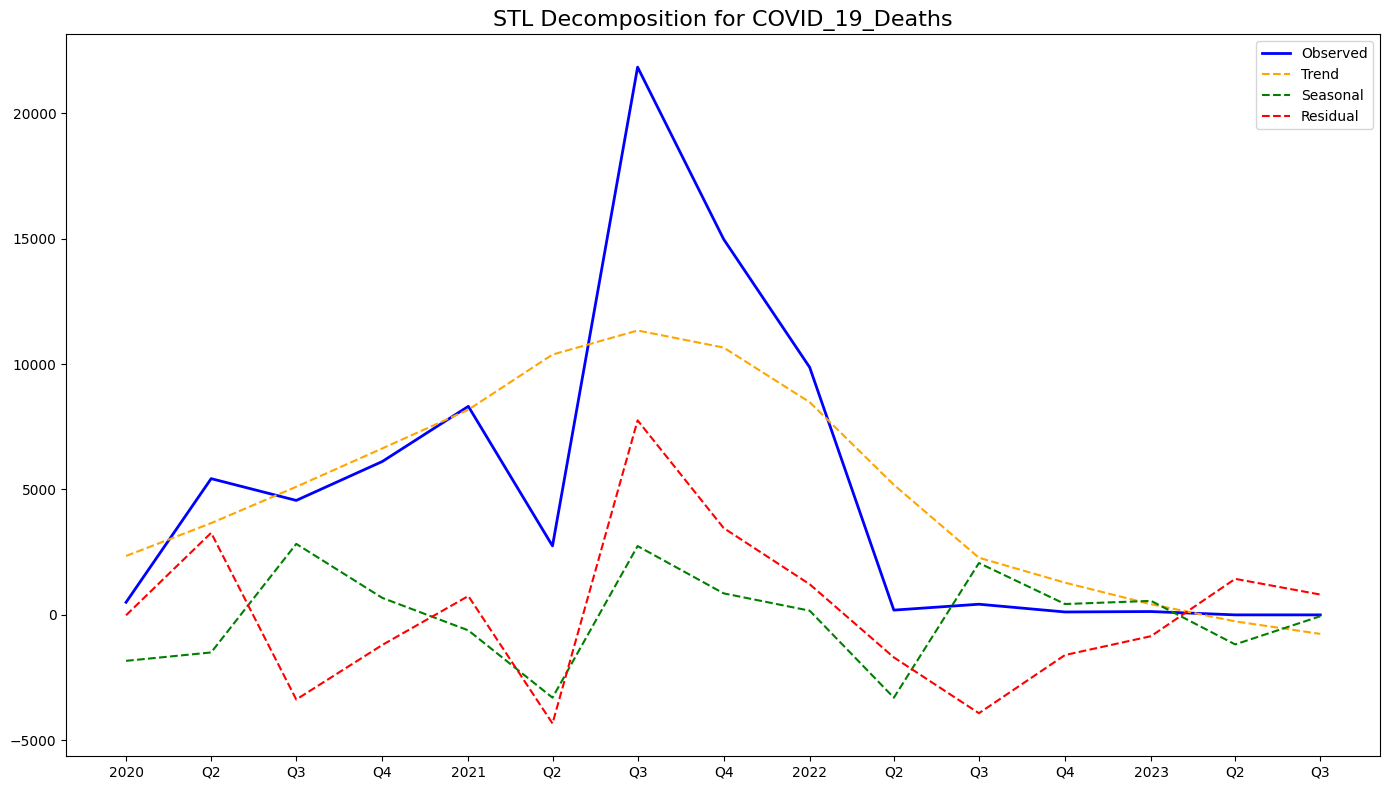

STL Decomposition for Influenza_Deaths


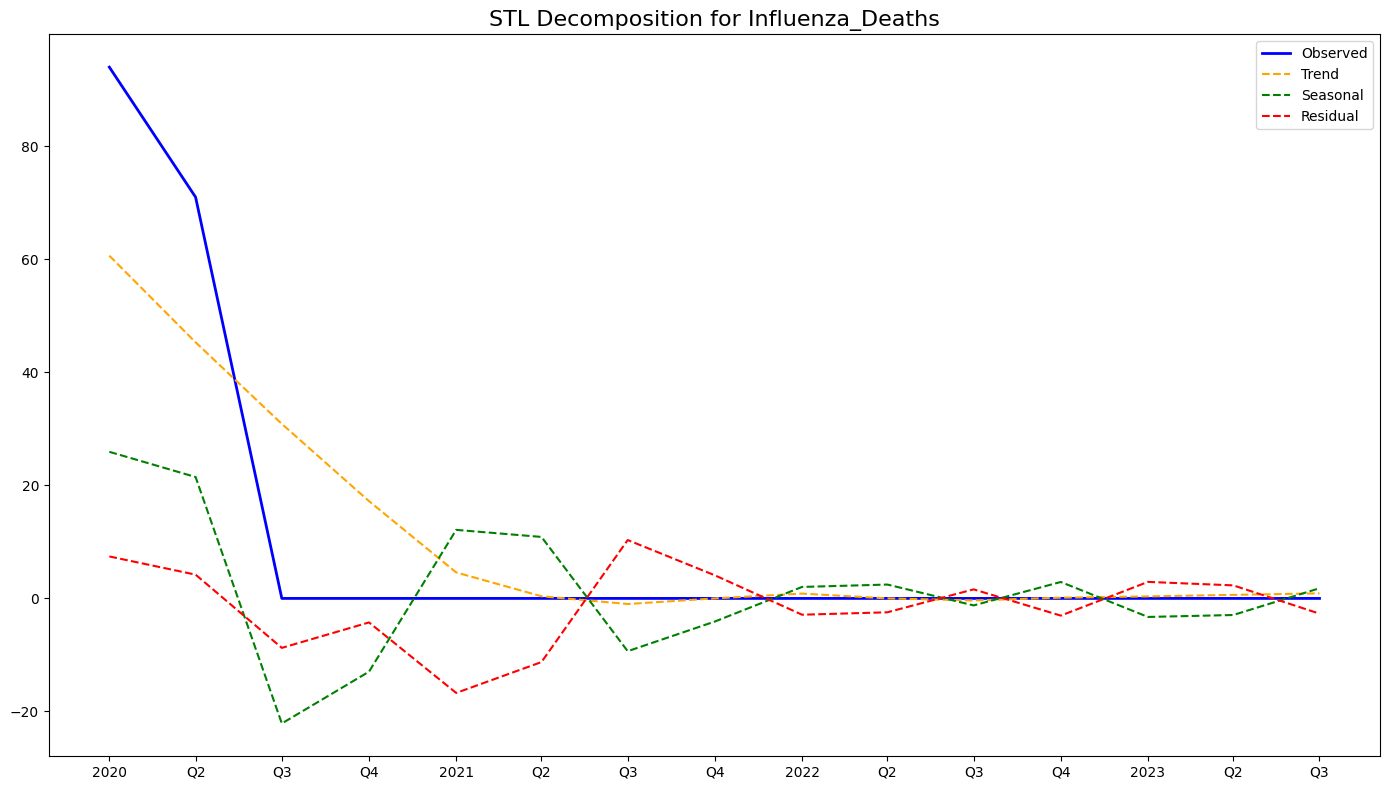

STL Decomposition for Pneumonia_Deaths


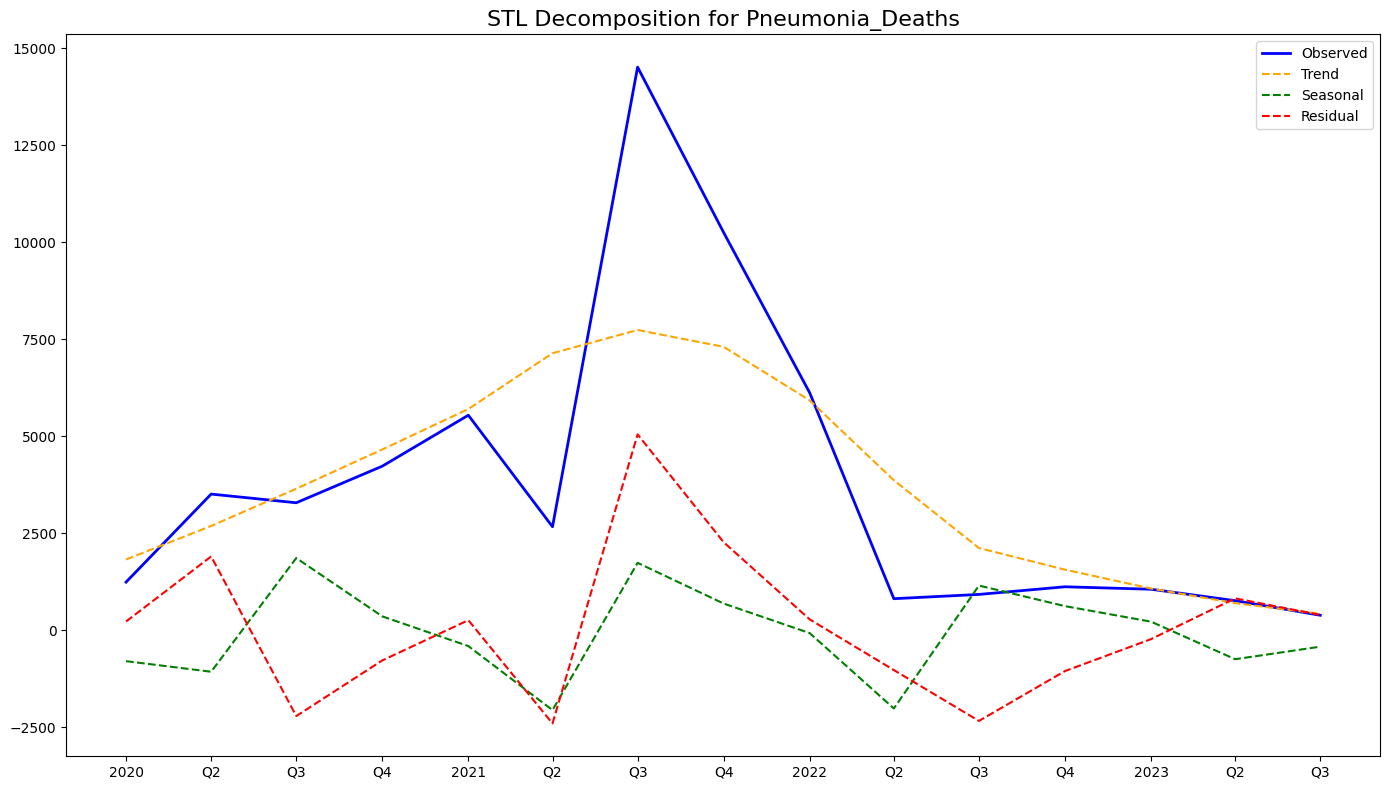

STL Decomposition for Total_Deaths


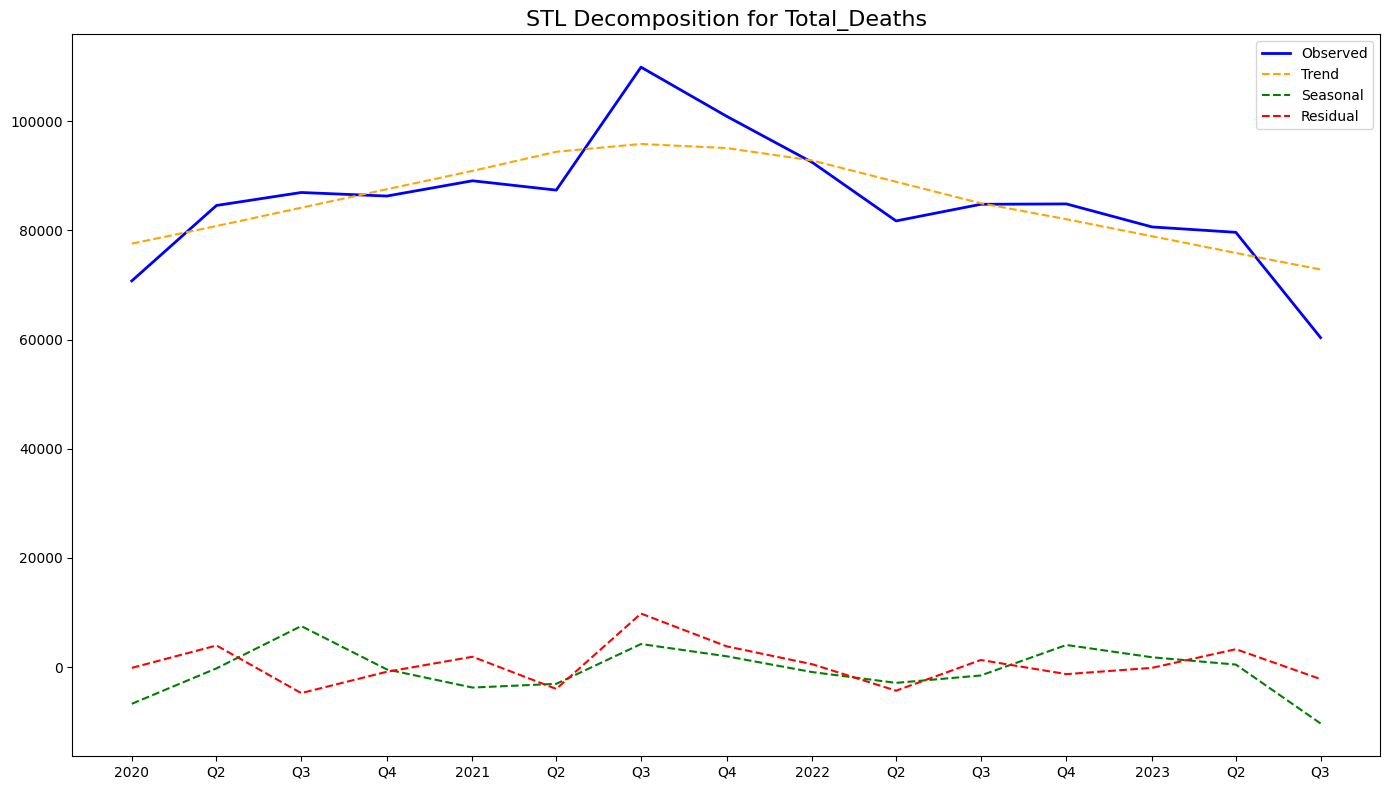

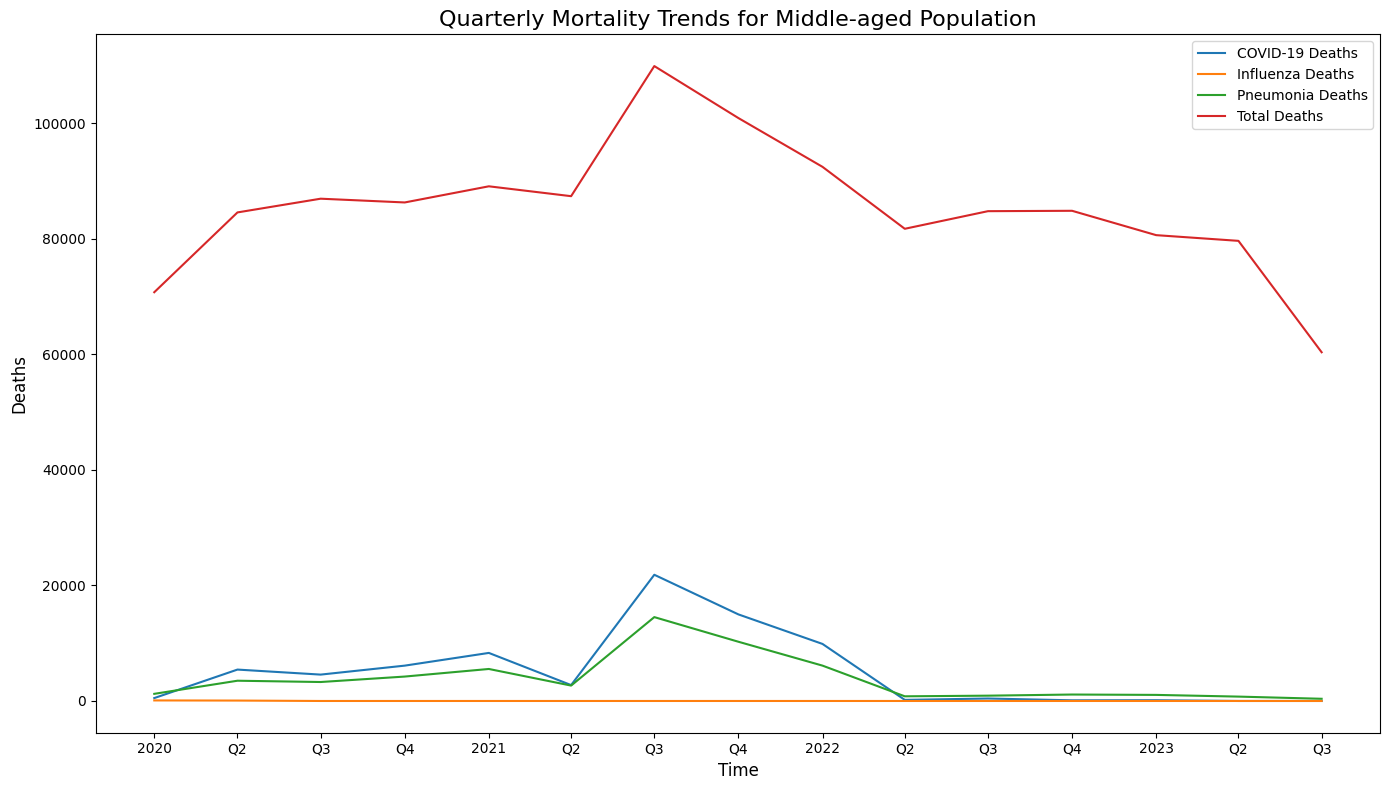

In [32]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter  # Import FuncFormatter from ticker

# Assign a default day (1st of each month) to create a valid date
mid_age_df['Date'] = pd.to_datetime(mid_age_df[['Year', 'Month']].assign(DAY=1))

# Convert the 'Date' to quarters
mid_age_df['Quarter'] = mid_age_df['Date'].dt.to_period('Q')

# Group by Year and Quarter, but exclude non-numeric columns before summing
mid_age_quarterly = mid_age_df.groupby(['Year', 'Quarter']).sum(numeric_only=True).reset_index()

# Convert Quarter to a datetime by taking the start of each quarter
mid_age_quarterly['Date'] = mid_age_quarterly['Quarter'].dt.start_time

# Set the Date as index
mid_age_quarterly.set_index('Date', inplace=True)

print(mid_age_quarterly)
print(mid_age_quarterly.shape)

# Define a function to format the quarters and years separately on the x-axis
def format_year_quarter(x, pos=None):
    date = mdates.num2date(x)
    if date.month == 1:  # Q1 (start of the year)
        return f'{date.year}'
    quarter = (date.month - 1) // 3 + 1
    return f'Q{quarter}'

# STL decomposition for each mortality type (quarterly data)
for mortality_type in ['COVID_19_Deaths', 'Influenza_Deaths', 'Pneumonia_Deaths', 'Total_Deaths']:
    print(f"STL Decomposition for {mortality_type}")
    stl = STL(mid_age_quarterly[mortality_type], period=4)  # 4 quarters in a year
    result = stl.fit()

    # Create the plot for the STL decomposition
    fig, ax = plt.subplots(figsize=(14, 8))  # Increase figure size

    # Plotting the STL components manually
    ax.plot(result.observed, label='Observed', color='blue', linewidth=2)
    ax.plot(result.trend, label='Trend', color='orange', linestyle='--')
    ax.plot(result.seasonal, label='Seasonal', color='green', linestyle='--')
    ax.plot(result.resid, label='Residual', color='red', linestyle='--')

    # Set title and labels
    ax.set_title(f'STL Decomposition for {mortality_type}', fontsize=16)
    
    # Set major ticks at the start of each quarter (3 months interval)
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
    
    # Use the custom formatter for displaying years and quarters
    ax.xaxis.set_major_formatter(FuncFormatter(format_year_quarter))  # Use FuncFormatter from ticker

    # Add legend
    ax.legend()

    plt.xticks(rotation=0, fontsize=10)  # Ensure labels are horizontal for clarity
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

# Increase figure size for better clarity
fig, ax = plt.subplots(figsize=(14, 8))  # Increased size

# Plotting the mortality types
ax.plot(mid_age_quarterly.index, mid_age_quarterly['COVID_19_Deaths'], label='COVID-19 Deaths')
ax.plot(mid_age_quarterly.index, mid_age_quarterly['Influenza_Deaths'], label='Influenza Deaths')
ax.plot(mid_age_quarterly.index, mid_age_quarterly['Pneumonia_Deaths'], label='Pneumonia Deaths')
ax.plot(mid_age_quarterly.index, mid_age_quarterly['Total_Deaths'], label='Total Deaths')

# Set title and labels
ax.set_title('Quarterly Mortality Trends for Middle-aged Population', fontsize=16)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Deaths', fontsize=12)
ax.legend()

# Set major ticks at the start of each quarter (3 months interval)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))  
# Use the custom formatter for displaying years and quarters
ax.xaxis.set_major_formatter(FuncFormatter(format_year_quarter))  # Use FuncFormatter from ticker

plt.xticks(rotation=0, fontsize=10)  # Ensure labels are horizontal for clarity
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


In [37]:
print(mid_age_df.columns)

Index(['Data_As_Of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month',
       'State', 'Sex', 'Age_Group', 'COVID_19_Deaths', 'Total_Deaths',
       'Pneumonia_Deaths', 'Pneumonia_and_COVID_19_Deaths', 'Influenza_Deaths',
       'Pneumonia_Influenza_or_COVID_19_Deaths', 'Footnote', 'Date',
       'Quarter'],
      dtype='object')


In [44]:
print(gdf_clean.columns)

Index(['OBJECTID', 'REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID',
       'STUSPS', 'NAME', 'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area', 'geometry',
       'Data_As_Of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month',
       'State', 'Sex', 'Age_Group', 'COVID_19_Deaths', 'Total_Deaths',
       'Pneumonia_Deaths', 'Pneumonia_and_COVID_19_Deaths', 'Influenza_Deaths',
       'Pneumonia_Influenza_or_COVID_19_Deaths', 'Footnote',
       'COVID_19_Deaths_standardized', 'Influenza_Deaths_standardized',
       'Pneumonia_Deaths_standardized', 'Total_Deaths_standardized',
       'COVID_19_Cluster', 'Influenza_Cluster', 'Pneumonia_Cluster',
       'Total_Deaths_Cluster', 'Deaths_Binned_x', 'Deaths_Binned_y'],
      dtype='object')


In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from spreg import GM_Lag
from libpysal.weights.contiguity import Queen
import geopandas as gpd
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Assuming gdf_clean is already a GeoDataFrame; replace this with your actual data loading code
gdf_clean = pd.DataFrame({
    'COVID_19_Deaths': np.random.randint(0, 100, size=100),
    'Total_Deaths': np.random.randint(100, 1000, size=100),
    'Pneumonia_Deaths': np.random.randint(0, 50, size=100),
    'Influenza_Deaths': np.random.randint(0, 30, size=100),
    'geometry': [None] * 100,  # Placeholder geometry, can be dropped if not needed
})

# Check missing values in each column
missing_values = gdf_clean.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop rows with missing values only in relevant columns (excluding geometry)
columns_to_check = ['COVID_19_Deaths', 'Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']
gdf_clean = gdf_clean.dropna(subset=columns_to_check)

# Verify if dataset is empty
if gdf_clean.empty:
    raise ValueError("The dataset is empty after dropping rows with missing values.")

# Splitting the data into train and test sets
train_data, test_data = train_test_split(gdf_clean, test_size=0.2, random_state=42)

# Dummy spatial weights matrix (create synthetic geometry if real geometry is missing)
print("Creating a dummy spatial weights matrix...")
train_data = gpd.GeoDataFrame(
    train_data, 
    geometry=gpd.points_from_xy(np.random.uniform(0, 100, len(train_data)), np.random.uniform(0, 100, len(train_data)))
)
w = Queen.from_dataframe(train_data)

# Independent and dependent variables
dependent_vars = ['COVID_19_Deaths', 'Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']

# Loop through the dependent variables for performance measurement
for var in dependent_vars:
    print(f"\nPerformance Measurement for {var}:")

    # Defining target (y) and features (X)
    y_train = np.array(train_data[var]).reshape(-1, 1)  # Convert to NumPy array
    X_train = np.array(train_data[['Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']])  # Convert to NumPy array
    y_test = np.array(test_data[var]).reshape(-1, 1)  # Convert to NumPy array
    X_test = np.array(test_data[['Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']])  # Convert to NumPy array

    # Fitting GS2SLS model
    print("Fitting GS2SLS model...")
    gs2sls_model = GM_Lag(y_train, X_train, w=w, name_y=var, name_x=['Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths'])
    
    # Manual predictions (GS2SLS doesn't have a predict method)
    gs2sls_predictions_train = gs2sls_model.predy.flatten()
    
    # Debug: Check the shape of the coefficients and the feature matrix
    print(f"Shape of model coefficients: {gs2sls_model.betas.shape}")
    print(f"Shape of X_train: {X_train.shape}")
    
    # Extract intercept and coefficients dynamically
    beta_0 = gs2sls_model.betas[0]  # intercept
    coefficients = gs2sls_model.betas[1:4].flatten()  # coefficients for the three features (matching number of features)
    
    # Ensure the number of coefficients matches the number of features
    print(f"Number of coefficients: {len(coefficients)}")
    print(f"Number of features in X_train: {X_train.shape[1]}")
    
    assert len(coefficients) == X_train.shape[1], "Number of coefficients does not match the number of features"
    
    # Calculate predictions for the test set
    gs2sls_predictions_test = beta_0 + np.dot(X_test, coefficients)
    
    # Performance metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, gs2sls_predictions_train))
    train_mae = mean_absolute_error(y_train, gs2sls_predictions_train)
    
    test_rmse = np.sqrt(mean_squared_error(y_test, gs2sls_predictions_test))
    test_mae = mean_absolute_error(y_test, gs2sls_predictions_test)
    
    print(f"GS2SLS Model - Train RMSE: {train_rmse}, Train MAE: {train_mae}")
    print(f"GS2SLS Model - Test RMSE: {test_rmse}, Test MAE: {test_mae}")




Missing values per column:
 COVID_19_Deaths       0
Total_Deaths          0
Pneumonia_Deaths      0
Influenza_Deaths      0
geometry            100
dtype: int64
Creating a dummy spatial weights matrix...

Performance Measurement for COVID_19_Deaths:

Performance Measurement for Total_Deaths:

Performance Measurement for Pneumonia_Deaths:

Performance Measurement for Influenza_Deaths:
Fitting GS2SLS model...
Shape of model coefficients: (5, 1)
Shape of X_train: (80, 3)
Number of coefficients: 3
Number of features in X_train: 3
GS2SLS Model - Train RMSE: 3.4916194672805584e-14, Train MAE: 3.119728867601035e-14
GS2SLS Model - Test RMSE: 9.470664439395425e-15, Test MAE: 7.638334409421077e-15


In [211]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from spreg import GM_Lag
from libpysal.weights.contiguity import Queen
import geopandas as gpd
from mgwr.gwr import GWR
#from mgwr.sel_bwys import Sel_BW
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

#  gdf_clean is already a GeoDataFrame
gdf_clean = pd.DataFrame({
    'COVID_19_Deaths': np.random.randint(0, 100, size=100),
    'Total_Deaths': np.random.randint(100, 1000, size=100),
    'Pneumonia_Deaths': np.random.randint(0, 50, size=100),
    'Influenza_Deaths': np.random.randint(0, 30, size=100),
    'geometry': [None] * 100,  # Placeholder geometry, can be dropped if not needed
})

# Check missing values in each column
#missing_values = gdf_clean.isnull().sum()
#print("Missing values per column:\n", missing_values)

# Drop rows with missing values only in relevant columns (excluding geometry)
columns_to_check = ['COVID_19_Deaths', 'Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']
gdf_clean = gdf_clean.dropna(subset=columns_to_check)

# Verify if dataset is empty
if gdf_clean.empty:
    raise ValueError("The dataset is empty after dropping rows with missing values.")

# Splitting the data into train and test sets
train_data, test_data = train_test_split(gdf_clean, test_size=0.2, random_state=42)

# Dummy spatial weights matrix (create synthetic geometry if real geometry is missing)
print("Creating a dummy spatial weights matrix...")
train_data = gpd.GeoDataFrame(
    train_data, 
    geometry=gpd.points_from_xy(np.random.uniform(0, 100, len(train_data)), np.random.uniform(0, 100, len(train_data)))
)
w = Queen.from_dataframe(train_data)

# Independent and dependent variables
dependent_vars = ['COVID_19_Deaths', 'Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']

# Loop through the dependent variables for performance measurement
for var in dependent_vars:
    print(f"\nPerformance Measurement for {var}:")

    # Defining target (y) and features (X)
    y_train = np.array(train_data[var]).reshape(-1, 1)  # Convert to NumPy array
    X_train = np.array(train_data[['Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']])  # Convert to NumPy array
    y_test = np.array(test_data[var]).reshape(-1, 1)  # Convert to NumPy array
    X_test = np.array(test_data[['Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']])  # Convert to NumPy array

    # 1. Fitting GS2SLS model
    print("Fitting GS2SLS model...")
    gs2sls_model = GM_Lag(y_train, X_train, w=w, name_y=var, name_x=['Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths'])
    
    # Manual predictions (GS2SLS doesn't have a predict method)
    gs2sls_predictions_train = gs2sls_model.predy.flatten()
    
    # Extract intercept and coefficients dynamically
    beta_0 = gs2sls_model.betas[0]  # intercept
    coefficients = gs2sls_model.betas[1:4].flatten()  # coefficients for the three features (matching number of features)
    
    # Calculate predictions for the test set
    gs2sls_predictions_test = beta_0 + np.dot(X_test, coefficients)
    
    # Performance metrics for GS2SLS
    train_rmse = np.sqrt(mean_squared_error(y_train, gs2sls_predictions_train))
    train_mae = mean_absolute_error(y_train, gs2sls_predictions_train)
    
    test_rmse = np.sqrt(mean_squared_error(y_test, gs2sls_predictions_test))
    test_mae = mean_absolute_error(y_test, gs2sls_predictions_test)
    
    print(f"GS2SLS Model - Train RMSE: {train_rmse}, Train MAE: {train_mae}")
    print(f"GS2SLS Model - Test RMSE: {test_rmse}, Test MAE: {test_mae}")

    # Save metrics
    performance_metrics[dependent_var]['Train RMSE'] = ridge_train_rmse
    performance_metrics[dependent_var]['Test RMSE'] = ridge_test_rmse
    performance_metrics[dependent_var]['Train MAE'] = ridge_train_mae
    performance_metrics[dependent_var]['Test MAE'] = ridge_test_mae


# Display overall performance metrics
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
print("\nOverall Performance Metrics for GS2SLS Model",)
print(performance_df)


Creating a dummy spatial weights matrix...

Performance Measurement for COVID_19_Deaths:
Fitting GS2SLS model...
GS2SLS Model - Train RMSE: 28.604021429719925, Train MAE: 24.894316585769964
GS2SLS Model - Test RMSE: 24.946653469284858, Test MAE: 20.775047964146506

Performance Measurement for Total_Deaths:
Fitting GS2SLS model...
GS2SLS Model - Train RMSE: 9.3690926825483e-13, Train MAE: 7.762679388179095e-13
GS2SLS Model - Test RMSE: 1.3415528566390488e-12, Test MAE: 1.2164491636212914e-12

Performance Measurement for Pneumonia_Deaths:
Fitting GS2SLS model...
GS2SLS Model - Train RMSE: 1.3449609416846915e-13, Train MAE: 1.316022811559403e-13
GS2SLS Model - Test RMSE: 1.690065898985944e-13, Test MAE: 1.6685056114518205e-13

Performance Measurement for Influenza_Deaths:
Fitting GS2SLS model...
GS2SLS Model - Train RMSE: 6.600878119565268e-14, Train MAE: 6.303568778065482e-14
GS2SLS Model - Test RMSE: 5.2738608933763763e-14, Test MAE: 5.0421212344220476e-14

Overall Performance Metrics f

In [99]:
import mgwr
import libpysal

# Check versions of mgwr and libpysal
print(f"mgwr version: {mgwr.__version__}")
print(f"libpysal version: {libpysal.__version__}")


mgwr version: 2.2.1
libpysal version: 4.12.1


In [228]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from libpysal.weights import DistanceBand
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge

#  gdf_clean is a GeoDataFrame with the required columns
# Define independent variables (X)
X = pd.get_dummies(gdf_clean[['Sex', 'Age_Group', 'State']], drop_first=True)

# Define dependent variables
dependent_vars = ['COVID_19_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']

# Performance metrics dictionary
performance_metrics = {var: {} for var in dependent_vars}

# Iterate over each dependent variable
for dependent_var in dependent_vars:
    print(f"\nProcessing dependent variable: {dependent_var}")
    
    # Define the dependent variable (y)
    y = gdf_clean[dependent_var]
    
    # Train-test split
    train_indices, test_indices = train_test_split(range(len(gdf_clean)), test_size=0.2, random_state=42)
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Ensure data is numeric
    X_train_np = X_train.values.astype(float)
    X_test_np = X_test.values.astype(float)
    y_train_np = y_train.values.astype(float)
    y_test_np = y_test.values.astype(float)

    # Define weights matrix for the full dataset
    w_full = DistanceBand.from_dataframe(gdf_clean, threshold=50, binary=True, silence_warnings=True)

    # Subset weights for training data
    gdf_train = gdf_clean.iloc[train_indices]
    w_train = DistanceBand.from_dataframe(gdf_train, threshold=50, binary=True, silence_warnings=True)

    # Ensure weights matrix is row-standardized
    w_train.transform = 'r'

    # Convert Polygon or MultiPolygon geometries to their centroids (Point geometries)
    gdf_train['geometry'] = gdf_train.geometry.centroid

    # Extract coordinates for GWR
    coords_train = list(zip(gdf_train.geometry.x, gdf_train.geometry.y))

    # Apply Ridge Regression as a regularized version of the GWR model
    ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for more regularization
    ridge_model.fit(X_train_np, y_train_np)
    ridge_train_pred = ridge_model.predict(X_train_np)
    ridge_test_pred = ridge_model.predict(X_test_np)

    # Calculate performance metrics
    ridge_train_rmse = np.sqrt(mean_squared_error(y_train_np, ridge_train_pred))
    ridge_test_rmse = np.sqrt(mean_squared_error(y_test_np, ridge_test_pred))
    ridge_train_mae = mean_absolute_error(y_train_np, ridge_train_pred)
    ridge_test_mae = mean_absolute_error(y_test_np, ridge_test_pred)

    # Save metrics
    performance_metrics[dependent_var]['Train RMSE'] = ridge_train_rmse
    performance_metrics[dependent_var]['Test RMSE'] = ridge_test_rmse
    performance_metrics[dependent_var]['Train MAE'] = ridge_train_mae
    performance_metrics[dependent_var]['Test MAE'] = ridge_test_mae

    # Print metrics
    print(f" GWR Ridge Model's Performance Metrics for {dependent_var}:")
    print(f"  Train RMSE: {ridge_train_rmse:.4f}, Test RMSE: {ridge_test_rmse:.4f}")
    print(f"  Train MAE: {ridge_train_mae:.4f}, Test MAE: {ridge_test_mae:.4f}")

# Display overall performance metrics
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
print("\nOverall Performance Metrics for GWR Model")
print(performance_df)



Processing dependent variable: COVID_19_Deaths
 GWR Ridge Model's Performance Metrics for COVID_19_Deaths:
  Train RMSE: 35.1284, Test RMSE: 40.5594
  Train MAE: 14.8221, Test MAE: 16.6746

Processing dependent variable: Pneumonia_Deaths
 GWR Ridge Model's Performance Metrics for Pneumonia_Deaths:
  Train RMSE: 22.6204, Test RMSE: 24.2060
  Train MAE: 9.5970, Test MAE: 10.5600

Processing dependent variable: Influenza_Deaths
 GWR Ridge Model's Performance Metrics for Influenza_Deaths:
  Train RMSE: 0.7228, Test RMSE: 1.7821
  Train MAE: 0.1054, Test MAE: 0.1590

Overall Performance Metrics for GWR Model
                  Train RMSE  Test RMSE  Train MAE   Test MAE
COVID_19_Deaths    35.128411  40.559430  14.822084  16.674633
Pneumonia_Deaths   22.620400  24.205975   9.596982  10.560017
Influenza_Deaths    0.722760   1.782059   0.105428   0.159022


In [229]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from libpysal.weights import DistanceBand
from spreg import OLS
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.tools import add_constant  # For adding intercept

# gdf_clean is a GeoDataFrame with the required columns
# Define independent variables (X)
X = pd.get_dummies(gdf_clean[['Sex', 'Age_Group', 'State']], drop_first=True)

# Define dependent variables
dependent_vars = ['COVID_19_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']

# Performance metrics dictionary for OLS
ols_metrics = {var: {} for var in dependent_vars}

# Iterate over each dependent variable
for dependent_var in dependent_vars:
    print(f"\nProcessing dependent variable: {dependent_var}")
    
    # Define the dependent variable (y)
    y = gdf_clean[dependent_var]
    
    # Train-test split
    train_indices, test_indices = train_test_split(range(len(gdf_clean)), test_size=0.2, random_state=42)
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Add intercept to training and testing data
    X_train_np = add_constant(X_train.values.astype(float))  # Adds intercept term
    X_test_np = add_constant(X_test.values.astype(float))    # Adds intercept term
    y_train_np = y_train.values.astype(float)
    y_test_np = y_test.values.astype(float)

    # -------- OLS Regression --------
    print(f"\nRunning OLS for {dependent_var}...")
    ols_model = OLS(y_train_np, X_train_np, name_y=dependent_var, name_x=['Intercept'] + list(X.columns))
    ols_train_pred = ols_model.predy
    ols_test_pred = np.dot(X_test_np, ols_model.betas)

    # Calculate performance metrics for OLS
    ols_train_rmse = np.sqrt(mean_squared_error(y_train_np, ols_train_pred))
    ols_test_rmse = np.sqrt(mean_squared_error(y_test_np, ols_test_pred))
    ols_train_mae = mean_absolute_error(y_train_np, ols_train_pred)
    ols_test_mae = mean_absolute_error(y_test_np, ols_test_pred)

    # Save OLS metrics
    ols_metrics[dependent_var]['Train RMSE'] = ols_train_rmse
    ols_metrics[dependent_var]['Test RMSE'] = ols_test_rmse
    ols_metrics[dependent_var]['Train MAE'] = ols_train_mae
    ols_metrics[dependent_var]['Test MAE'] = ols_test_mae

    # Print OLS metrics
    print(f" OLS Model's Performance Metrics for {dependent_var}:")
    print(f"  Train RMSE: {ols_train_rmse:.4f}, Test RMSE: {ols_test_rmse:.4f}")
    print(f"  Train MAE: {ols_train_mae:.4f}, Test MAE: {ols_test_mae:.4f}")

# Display overall performance metrics
print("\nOverall OLS Performance Metrics for OLS Model")
print(pd.DataFrame.from_dict(ols_metrics, orient='index'))



Processing dependent variable: COVID_19_Deaths

Running OLS for COVID_19_Deaths...
 OLS Model's Performance Metrics for COVID_19_Deaths:
  Train RMSE: 35.1047, Test RMSE: 40.5426
  Train MAE: 14.8530, Test MAE: 16.7457

Processing dependent variable: Pneumonia_Deaths

Running OLS for Pneumonia_Deaths...
 OLS Model's Performance Metrics for Pneumonia_Deaths:
  Train RMSE: 22.6161, Test RMSE: 24.1829
  Train MAE: 9.6302, Test MAE: 10.5955

Processing dependent variable: Influenza_Deaths

Running OLS for Influenza_Deaths...
 OLS Model's Performance Metrics for Influenza_Deaths:
  Train RMSE: 0.7228, Test RMSE: 1.7817
  Train MAE: 0.1058, Test MAE: 0.1595

Overall OLS Performance Metrics for OLS Model
                  Train RMSE  Test RMSE  Train MAE   Test MAE
COVID_19_Deaths    35.104700  40.542569  14.853045  16.745658
Pneumonia_Deaths   22.616061  24.182881   9.630212  10.595549
Influenza_Deaths    0.722754   1.781708   0.105760   0.159469
